# Movie Success Prediction and Analysis Using TMDb Data

# 1. Introduction

This project aims to predict movie ratings and revenue using regression techniques, leveraging a comprehensive dataset from The Movie Database (TMDb). By exploring various features such as budget, genres, popularity, and more, we seek to uncover trends and key factors that contribute to a film's success. Through data analysis and machine learning, this notebook provides insights into the dynamics of the movie industry and builds predictive models to estimate a movie's performance.

Installation packages for my project

In [ ]:
%pip install kaggle
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn



^C
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install scikit-learn

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import re
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures


# 2. Data Collection

The data is obtained through Kaggle datasets. A zip file was then extracted and the csv files were read into pandas dataframes.

In [3]:
!kaggle datasets list -s "movie"

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!kaggle datasets download tmdb/tmdb-movie-metadata

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


 Unzip the file to access contents and list files

In [5]:
with zipfile.ZipFile("tmdb-movie-metadata.zip", "r") as zip_ref:
    zip_ref.extractall("tmdb_movie_data")

List files in the extracted folder

In [6]:
os.listdir("tmdb_movie_data")

['tmdb_5000_credits.csv', 'tmdb_5000_movies.csv']

Read CSV files into pandas dataframe

In [97]:
path = "tmdb_movie_data/tmdb_5000_movies.csv"
movies = pd.read_csv(path)
movies.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [98]:
path2 = "tmdb_movie_data/tmdb_5000_credits.csv"
credits = pd.read_csv(path2)
credits.head(10)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de..."
7,99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de..."
8,767,Harry Potter and the Half-Blood Prince,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de..."
9,209112,Batman v Superman: Dawn of Justice,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de..."


# 3. Data Exploration and Cleaning
We will start with the movies dataframe and begin to explore the data 

# 3.2 Initial Data Descriptions

In [99]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [100]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [101]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [102]:
movies.shape
print(f"There are {movies.shape[0]} rows and {movies.shape[1]} columns")

There are 4803 rows and 20 columns


In [103]:
movies.describe(include="all")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
count,4.803000e+03,4803,1712,4803.000000,4803,4803,4803,4800,4803.000000,4803,4803,4802,4.803000e+03,4801.000000,4803,4803,3959,4803,4803.000000,4803.000000
unique,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,469,3280,NaN,NaN,544,3,3944,4800,NaN,NaN
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thehungergames.movie/,NaN,[],en,Batman,Two brothers share a house in LA's Fairfax dis...,NaN,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host,NaN,NaN
freq,NaN,370,4,NaN,412,4505,2,1,NaN,351,2977,10,NaN,NaN,3171,4795,3,2,NaN,NaN
mean,2.904504e+07,NaN,NaN,57165.484281,NaN,NaN,NaN,NaN,21.492301,NaN,NaN,NaN,8.226064e+07,106.875859,NaN,NaN,NaN,NaN,6.092172,690.217989
std,4.072239e+07,NaN,NaN,88694.614033,NaN,NaN,NaN,NaN,31.816650,NaN,NaN,NaN,1.628571e+08,22.611935,NaN,NaN,NaN,NaN,1.194612,1234.585891
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,7.900000e+05,NaN,NaN,9014.500000,NaN,NaN,NaN,NaN,4.668070,NaN,NaN,NaN,0.000000e+00,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000
50%,1.500000e+07,NaN,NaN,14629.000000,NaN,NaN,NaN,NaN,12.921594,NaN,NaN,NaN,1.917000e+07,103.000000,NaN,NaN,NaN,NaN,6.200000,235.000000
75%,4.000000e+07,NaN,NaN,58610.500000,NaN,NaN,NaN,NaN,28.313505,NaN,NaN,NaN,9.291719e+07,118.000000,NaN,NaN,NaN,NaN,6.800000,737.000000


Generate the statistical analysis for the popularity and vote average and vote count


In [104]:
movies[['popularity','vote_average','vote_count']].describe()

,popularity,vote_average,vote_count
count,4803.000000,4803.000000,4803.000000
mean,21.492301,6.092172,690.217989
std,31.816650,1.194612,1234.585891
min,0.000000,0.000000,0.000000
25%,4.668070,5.600000,54.000000
50%,12.921594,6.200000,235.000000
75%,28.313505,6.800000,737.000000
max,875.581305,10.000000,13752.000000


In [105]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

# 3.2 Missing Values
Check for missing values and show their count



In [106]:
def nullColumns(data):  
    nulls = data.isnull().sum()
    return nulls[nulls != 0]

print(nullColumns(movies)) 
print(nullColumns(credits)) #credits has no null values

homepage        3091
overview           3
release_date       1
runtime            2
tagline          844
dtype: int64
Series([], dtype: int64)


Looking at what rows have a null overview

In [107]:
movies[movies['overview'].isnull()]


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Food Chains,7.4,8


We can see that their vote counts are all very low and they all have multiple missing values. These movies will have a neglible effect on data analysis and so we will remove these rows from our dataset.

In [108]:
movies = movies.dropna(subset= 'overview', axis = 0)

In [109]:
print(nullColumns(movies))

homepage        3088
release_date       1
tagline          841
dtype: int64


This has also coincidentally removed the missing values of runtime as two of the records also had their runtime as null

In [110]:
movies[movies['release_date'].isnull()]


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


It is also safe to remove this record as it no effect on the dataset due to it's 0 popularity 

In [111]:
movies = movies.dropna(subset= 'release_date', axis = 0)


We can leave the homepage as missing values as we will not need these columns and will probably remove them from the dataset as this column doesn't have an effect on film popularity.

However, having a tagline could have an effect on the popularity of a film and so we will keep this column but leave the missing values as is. We cannot replace these with anything as there is no statistical inference to be made from the other tagline values to replace the missing values.

In [112]:
credits.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

# 3.3 Further data explorations

Check the data types of the data


In [113]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

Check for duplicate values

In [114]:
movies.duplicated().sum() 

np.int64(0)

Check for the number of unique values in each column


In [115]:
movies.nunique()

budget                   434
genres                  1175
homepage                1691
id                      4799
keywords                4220
original_language         37
original_title          4797
overview                4799
popularity              4798
production_companies    3695
production_countries     469
release_date            3278
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4796
vote_average              71
vote_count              1609
dtype: int64

In [116]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


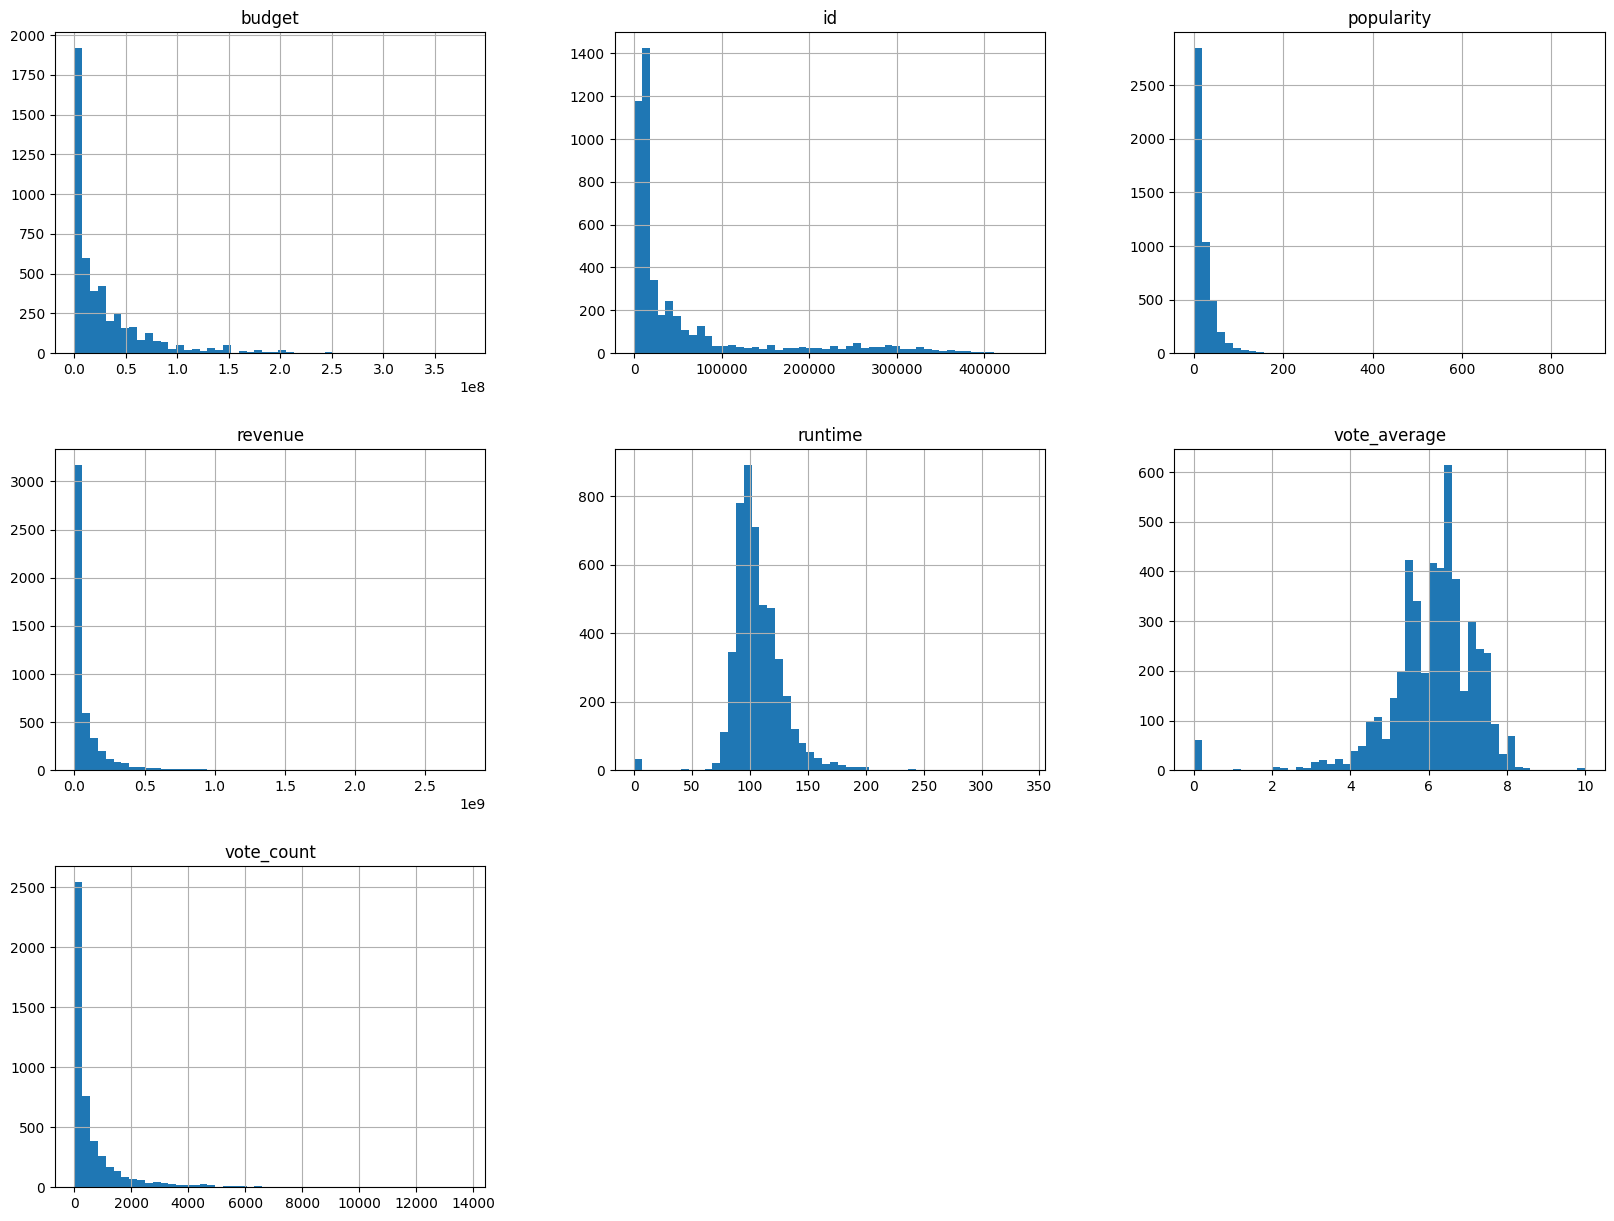

In [117]:
movies.hist(bins=50,figsize=(20,15))
plt.show()

# 3.4 Categorical data 

Value counts for columns with categorical data

Value counts for 'genres':
genres
[{"id": 18, "name": "Drama"}]                                                                    369
[{"id": 35, "name": "Comedy"}]                                                                   282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                  164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                 144
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                      142
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]    109
[{"id": 27, "name": "Horror"}, {"id": 53, "name": "Thriller"}]                                    88
[{"id": 99, "name": "Documentary"}]                                                               66
[{"id": 27, "name": "Horror"}]                                                                    64
[{"id": 18, "name": "Drama"}, {"id": 53, "name": "Thrille

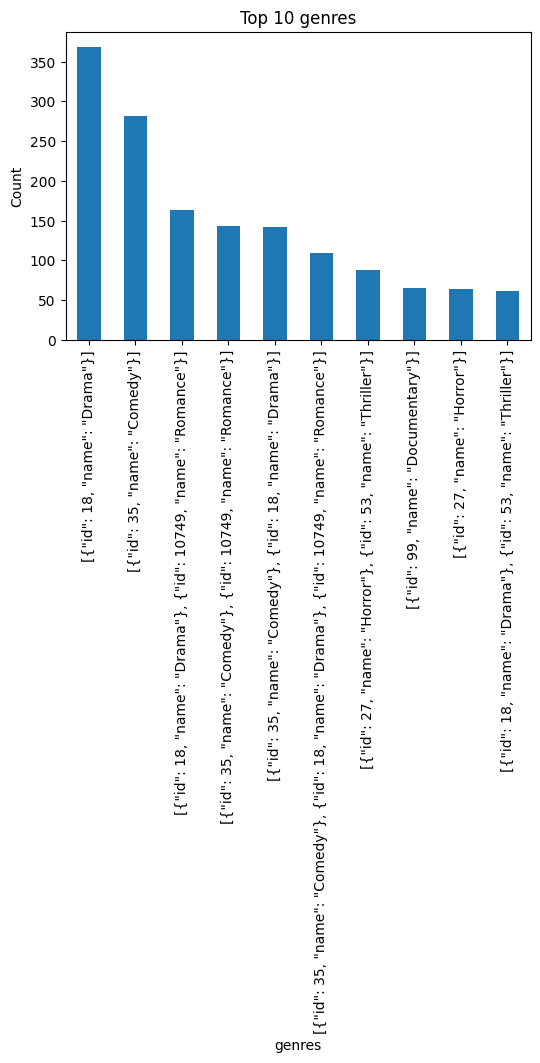

Value counts for 'original_language':
original_language
en    4503
fr      70
es      32
zh      27
de      26
hi      19
ja      16
it      13
cn      12
ko      11
Name: count, dtype: int64


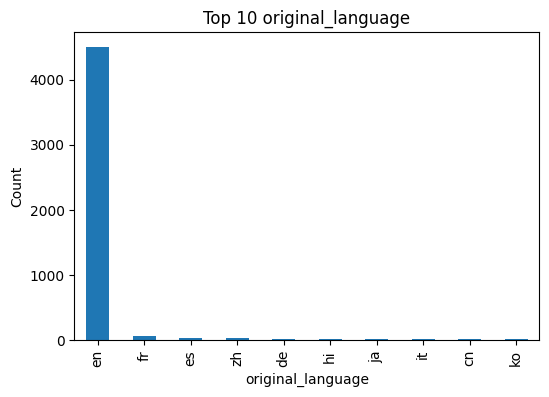

Value counts for 'spoken_languages':
spoken_languages
[{"iso_639_1": "en", "name": "English"}]                                                                          3170
[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\u00f1ol"}]                              127
[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "fr", "name": "Fran\u00e7ais"}]                             114
[]                                                                                                                  84
[{"iso_639_1": "es", "name": "Espa\u00f1ol"}, {"iso_639_1": "en", "name": "English"}]                               54
[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "de", "name": "Deutsch"}]                                    53
[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "it", "name": "Italiano"}]                                   51
[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "ru", "name": "P\u0443\u0441\u0441\u043a\u0438\u0439"}]   

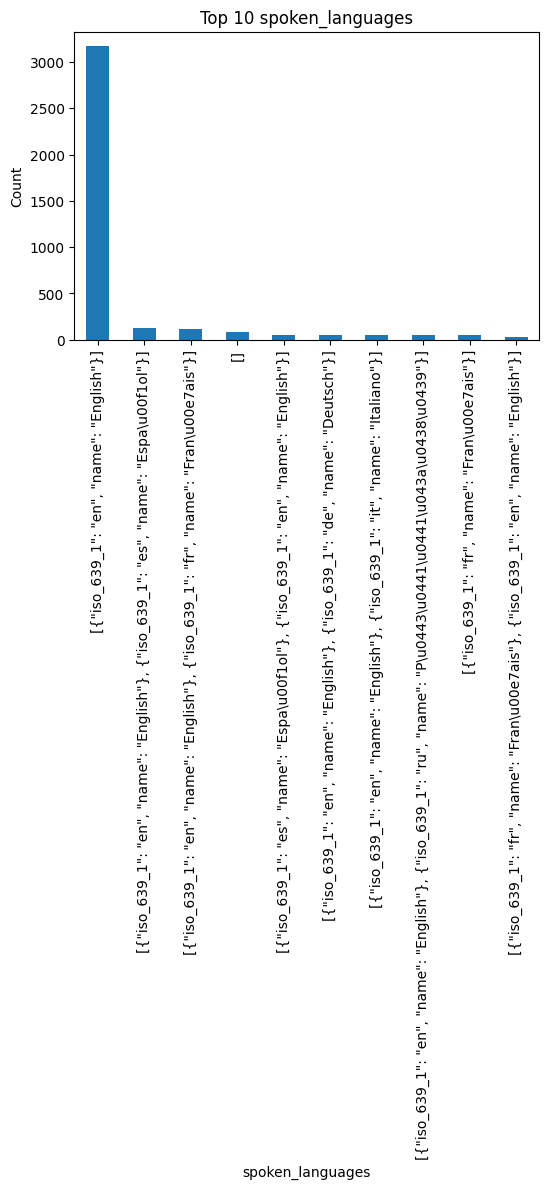

Value counts for 'keywords':
keywords
[]                                                                                       410
[{"id": 10183, "name": "independent film"}]                                               55
[{"id": 187056, "name": "woman director"}]                                                42
[{"id": 179431, "name": "duringcreditsstinger"}]                                          15
[{"id": 6075, "name": "sport"}]                                                           13
[{"id": 10183, "name": "independent film"}, {"id": 187056, "name": "woman director"}]     10
[{"id": 5565, "name": "biography"}]                                                        5
[{"id": 4344, "name": "musical"}]                                                          5
[{"id": 9937, "name": "suspense"}]                                                         5
[{"id": 4565, "name": "dystopia"}]                                                         3
Name: count, dtype: int64


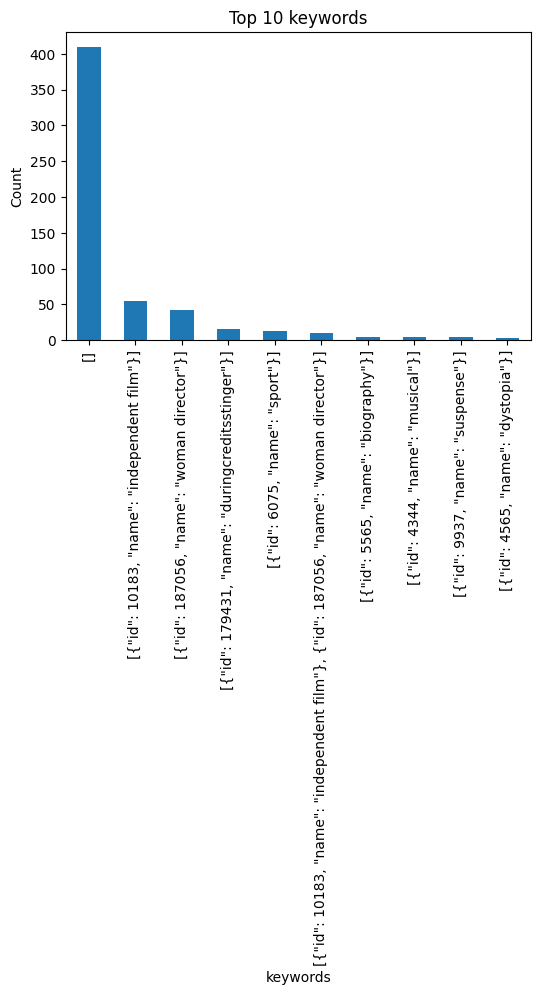

Value counts for 'production_companies':
production_companies
[]                                                                 349
[{"name": "Paramount Pictures", "id": 4}]                           58
[{"name": "Universal Pictures", "id": 33}]                          45
[{"name": "New Line Cinema", "id": 12}]                             38
[{"name": "Columbia Pictures", "id": 5}]                            37
[{"name": "Metro-Goldwyn-Mayer (MGM)", "id": 8411}]                 32
[{"name": "Twentieth Century Fox Film Corporation", "id": 306}]     31
[{"name": "Walt Disney Pictures", "id": 2}]                         27
[{"name": "Warner Bros.", "id": 6194}]                              27
[{"name": "Touchstone Pictures", "id": 9195}]                       26
Name: count, dtype: int64


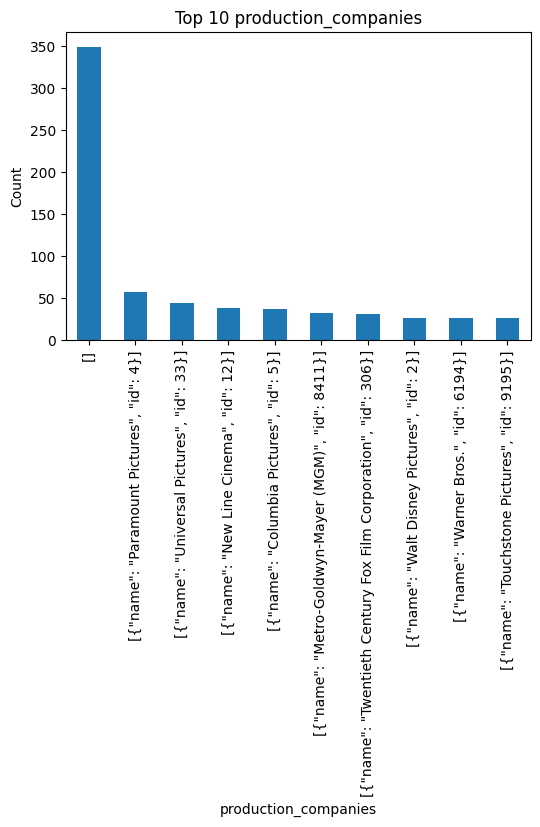

Value counts for 'production_countries':
production_countries
[{"iso_3166_1": "US", "name": "United States of America"}]                                                    2977
[{"iso_3166_1": "GB", "name": "United Kingdom"}, {"iso_3166_1": "US", "name": "United States of America"}]     181
[]                                                                                                             172
[{"iso_3166_1": "GB", "name": "United Kingdom"}]                                                               130
[{"iso_3166_1": "DE", "name": "Germany"}, {"iso_3166_1": "US", "name": "United States of America"}]            119
[{"iso_3166_1": "CA", "name": "Canada"}, {"iso_3166_1": "US", "name": "United States of America"}]              88
[{"iso_3166_1": "FR", "name": "France"}]                                                                        49
[{"iso_3166_1": "AU", "name": "Australia"}, {"iso_3166_1": "US", "name": "United States of America"}]           46
[{"iso_3166_1": "C

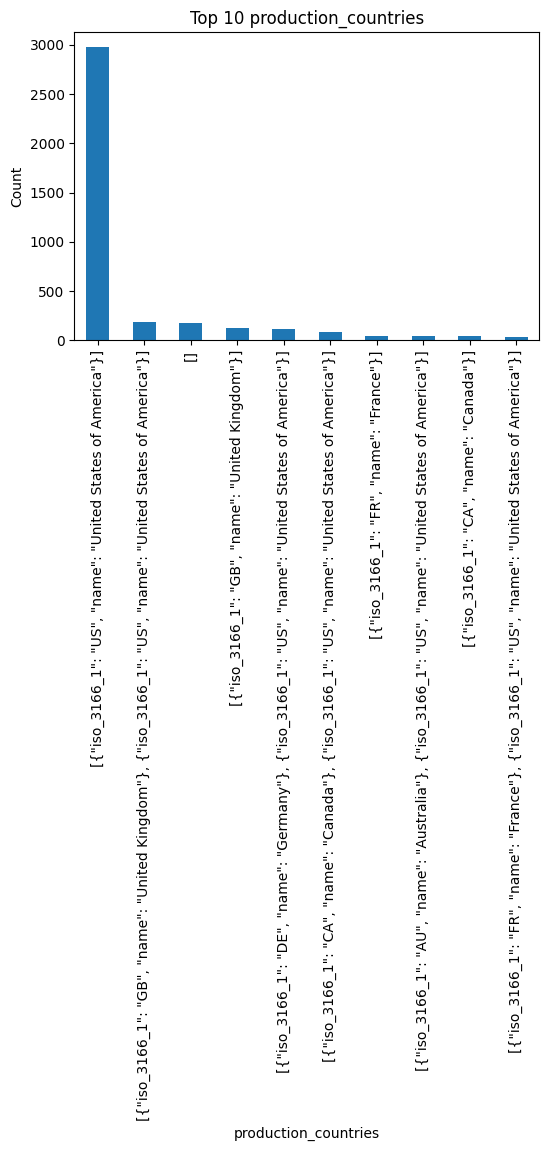

Value counts for 'status':
status
Released           4791
Rumored               5
Post Production       3
Name: count, dtype: int64


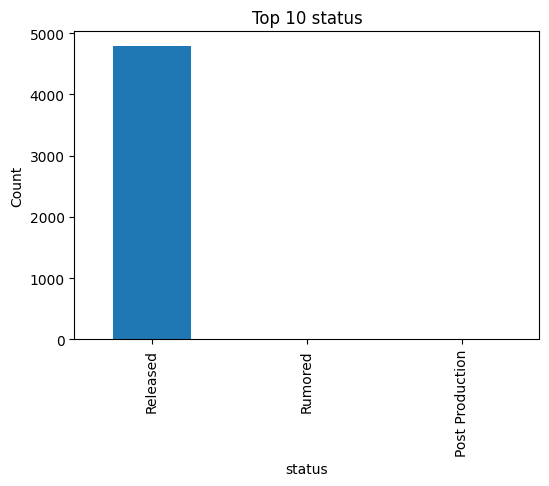

In [118]:
# Explore value counts for each categorical column individually

categorical_cols = ['genres', 'original_language', 'spoken_languages', 'keywords', 'production_companies','production_countries','status']

def categorical_top_10(cols):
    for col in cols:
        print(f"Value counts for '{col}':")
        #print the top 10 for each category
        top_10 = movies[col].value_counts().head(10)
        print(top_10)
        
        #Visualisation of the categories
        plt.figure(figsize = (6,4))
        top_10.plot(kind='bar')
        plt.title(f"Top 10 {col}")
        plt.ylabel("Count")
        plt.xlabel(col)
        plt.show()

categorical_top_10(categorical_cols)

# 3.5 Numerical data

Visualisation of the distribution of numerical data from the movies dataset

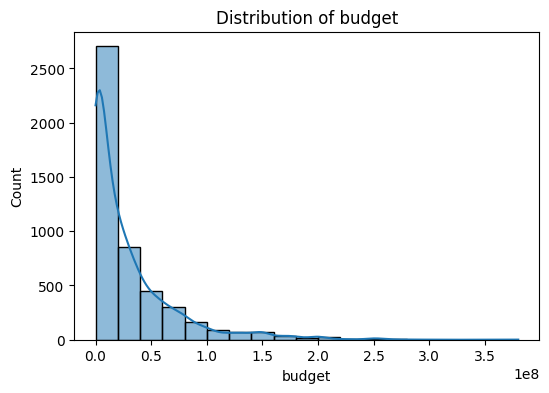

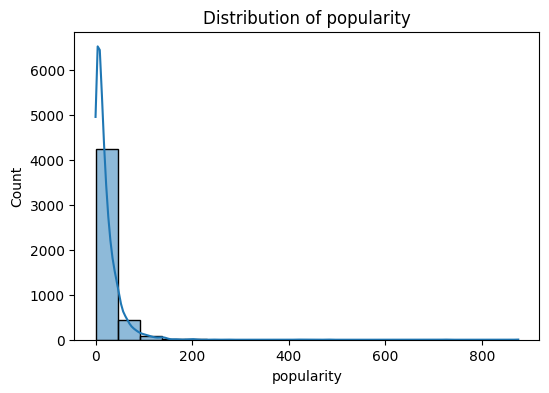

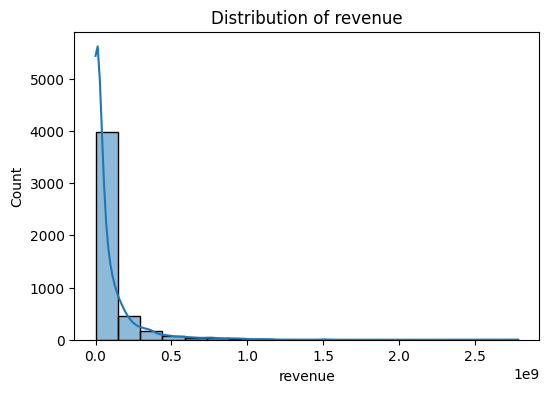

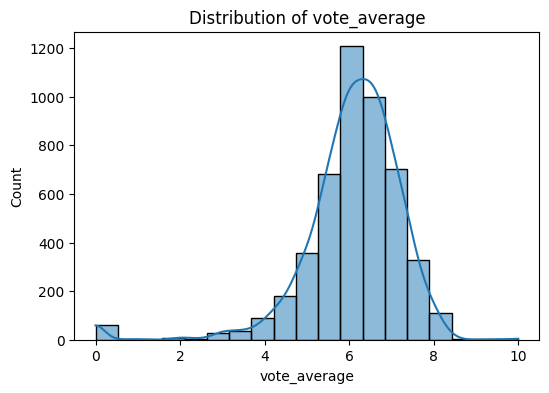

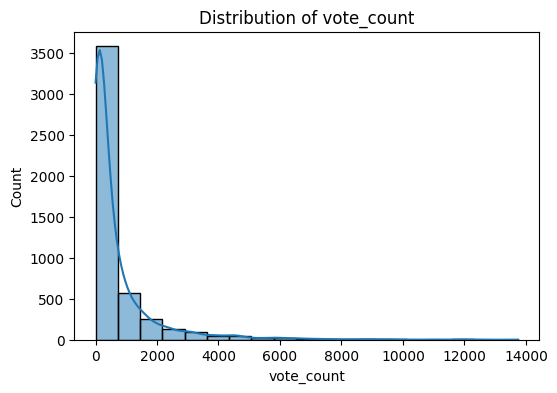

In [119]:
numerical_cols = ['budget','popularity','revenue','vote_average','vote_count']
for col in numerical_cols:
    width = 6
    height = 4
    plt.figure(figsize=(width,height))
    sns.histplot(movies[col], bins = np.linspace(min(movies[col]),max(movies[col]),20), kde = True)
    plt.title(f"Distribution of {col}")
    plt.show()

Skewed features:
budget
popularity
revenue
vote_count

I will show a box plot of the different numerical columns to see the outliers and what the median of each column is

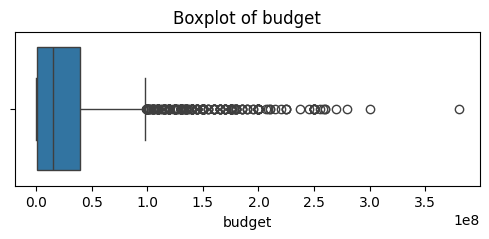

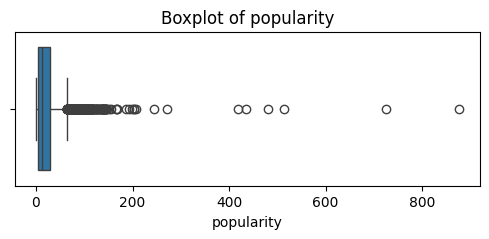

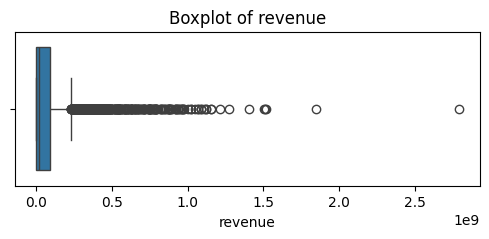

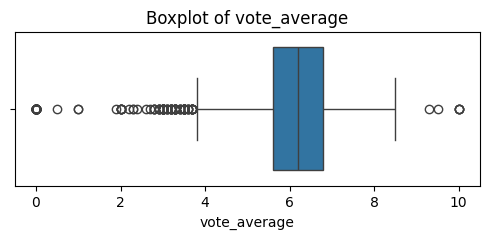

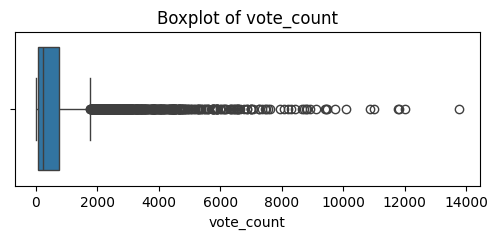

In [120]:
for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=movies[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

A scatterplot of pairs of the features will be shown below to establish relationships

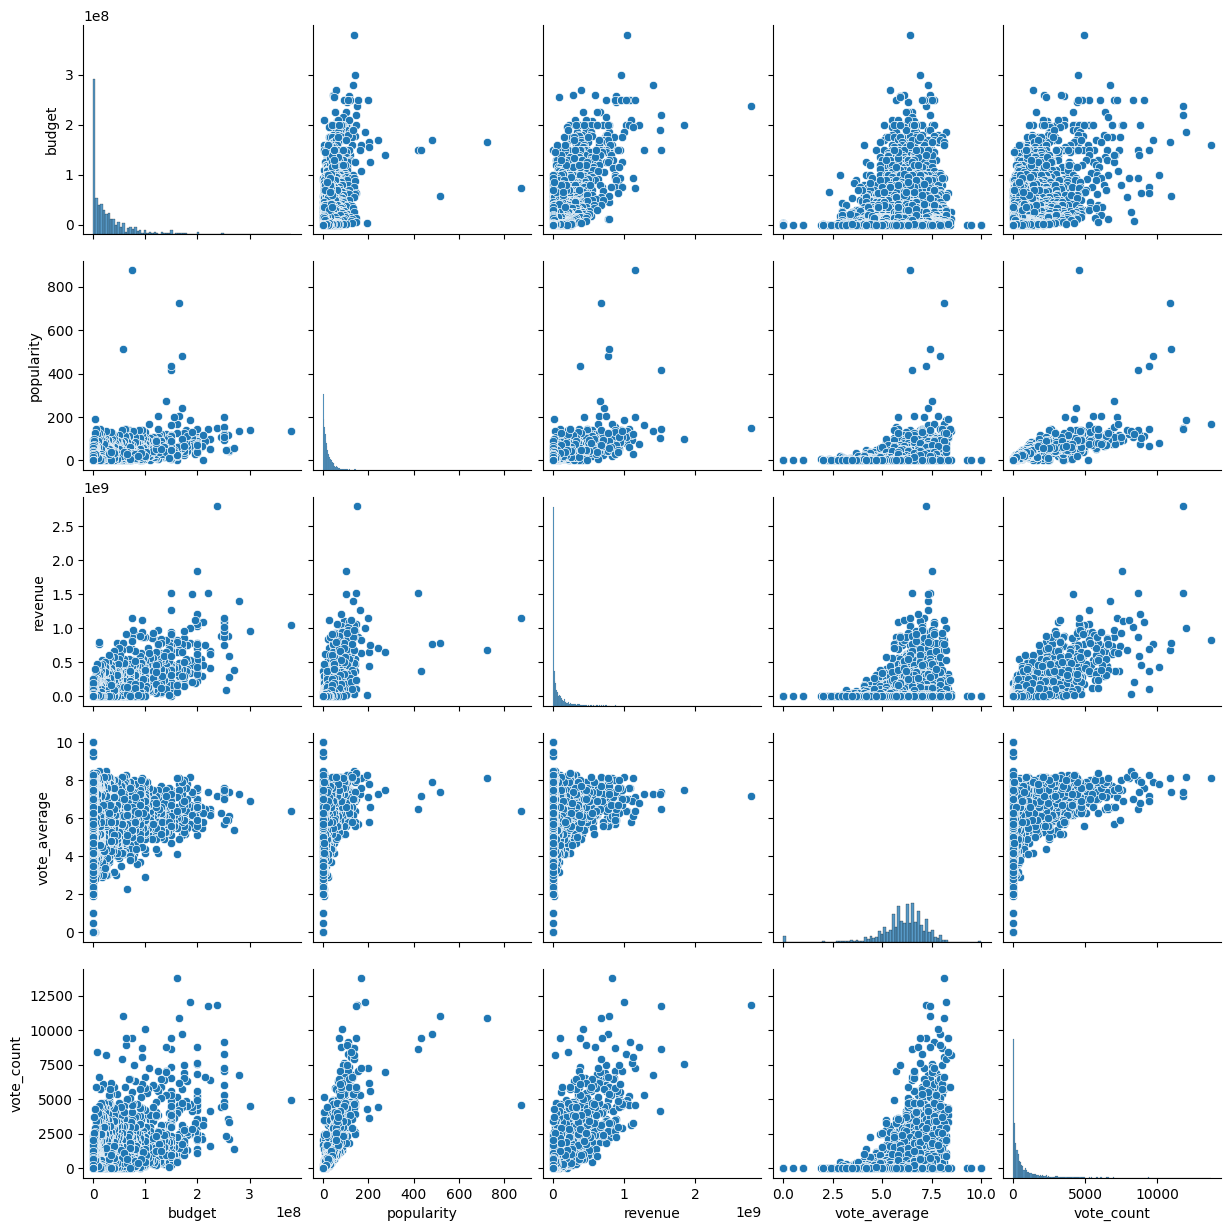

In [121]:
sns.pairplot(movies[numerical_cols])
plt.show()

As the scatterplot doesnt show a great visualisation of all the data and how they are correlated, a correlation heatmap will provide a much faster and clearer picture of which numerical features have a high/low correlation.

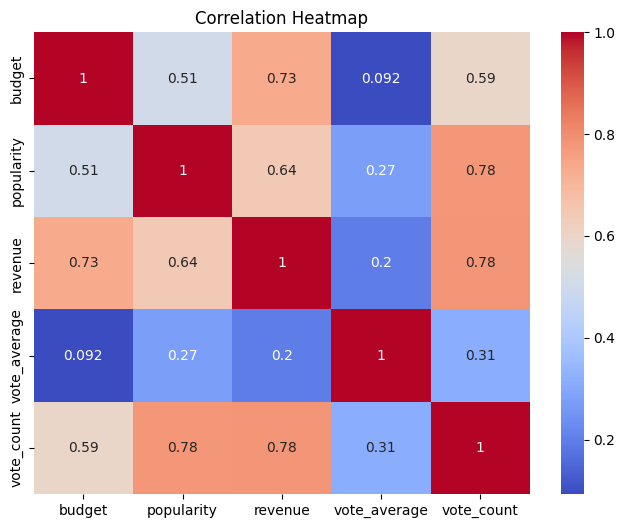

In [122]:
plt.figure(figsize=(8, 6))
sns.heatmap(movies[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Removing unnecessary columns

In [123]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

We can remove the homepage, id, overview, original_title and tagline columns.
Homepage and tagline have many missing values and are also not needed for predicting movie ratings and revenue.
ID, original_title and overview are obsolete and are not needed for the modelling.

In [124]:
movies = movies.drop(columns = ['homepage','id','original_title','overview', 'tagline'])
movies.head(5)

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124


What we can conclude from our initial data exploration:

-**Budget and Revenue have a high correlation**

-**Popularity and Vote Count have a high correlation**

-**Revenue and Vote Count have a high correlation**


It is also worth exploring in more detail:
- Popularity and Revenue
- Budget and Vote Count

We will now delve deeper into the correlations and produce models and predictions later on 



In [125]:
movies.head(10)

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...","[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Avengers: Age of Ultron,7.3,6767
8,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...",en,98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,933959197,153.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Harry Potter and the Half-Blood Prince,7.4,5293
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...",en,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-23,873260194,151.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Batman v Superman:

The skewed features from visualising the histogram were: budget, popularity, revenue and vote_count 
We need to transform these features to aid modelling later as the skewness will affect the model and may produce incorrect predictions

In [126]:
print(movies['popularity'].skew())

9.721300885675499


In [127]:
#Log-transform the skewed features
movies['log_budget'] = np.log1p(movies['budget'])
movies['log_popularity'] = np.log1p(movies['popularity'])
movies['log_revenue'] = np.log1p(movies['revenue'])
movies['log_vote_count'] = np.log1p(movies['vote_count'])


Visualising the log_budget column to see how to bin

In [128]:
movies[['log_budget','title','budget']].sort_values(by = ['log_budget'], ascending= False).head(50)

,log_budget,title,budget
17,19.755682,Pirates of the Caribbean: On Stranger Tides,380000000
1,19.519293,Pirates of the Caribbean: At World's End,300000000
7,19.450300,Avengers: Age of Ultron,280000000
10,19.413933,Superman Returns,270000000
6,19.376192,Tangled,260000000
4,19.376192,John Carter,260000000
5,19.368470,Spider-Man 3,258000000
13,19.356774,The Lone Ranger,255000000
22,19.336971,The Hobbit: The Desolation of Smaug,250000000
8,19.336971,Harry Potter and the Half-Blood Prince,250000000


Work out the profit of each film

In [129]:
movies['profit'] = movies['revenue'] / movies['budget'].replace(0, np.nan)

Work out the popularity per vote for each film

In [130]:
movies['popularity_per_vote'] = movies['popularity'] / movies['vote_count'].replace(0, np.nan)

We also need to categorise the numerical variables:
High/Medium/Low Budget
High/Medium/Low Revenue
High/Medium/Low Popularity
High/Medium/Low Vote Count

I will create bins for each of these features

In [131]:
#budget
budget_bins = np.linspace(min(movies['budget']),max(movies['budget']),4)
#revenue
revenue_bins = np.linspace(min(movies['revenue']),max(movies['revenue']),4)
#popularity
pop_bins = np.linspace(min(movies['popularity']),max(movies['popularity']),4)
#vote count
vote_bins = np.linspace(min(movies['vote_count']),max(movies['vote_count']),4)

group_names = ['Low','Medium','High']



Need to use quantile-based binning due to skewed features resulting in incorrect bin labels with equal-width bins.


In [132]:
movies['budget'] = pd.cut(movies['budget'], budget_bins, labels=group_names, include_lowest= True)
movies['revenue'] = pd.cut(movies['revenue'], revenue_bins, labels=group_names, include_lowest= True)
movies['popularity'] = pd.cut(movies['popularity'], pop_bins, labels=group_names,include_lowest= True)
movies['vote_count'] = pd.cut(movies['vote_count'], vote_bins, labels=group_names, include_lowest= True)


Visualise the binning of the four features

In [133]:
movies[['budget','revenue','popularity','vote_count']]

,budget,revenue,popularity,vote_count
0,Medium,High,Low,High
1,High,Medium,Low,Low
2,Medium,Low,Low,Low
3,Medium,Medium,Low,Medium
4,High,Low,Low,Low
...,...,...,...,...
4798,Low,Low,Low,Low
4799,Low,Low,Low,Low
4800,Low,Low,Low,Low
4801,Low,Low,Low,Low


In [134]:
# Show movies with log_budget > 19, displaying their budget and title
movies.loc[movies['log_budget'] > 19.5, ['budget', 'title']]

,budget,title
1,High,Pirates of the Caribbean: At World's End
17,High,Pirates of the Caribbean: On Stranger Tides


# Exploratory Data Analysis

In [135]:
print(movies.dtypes)

budget                  category
genres                    object
keywords                  object
original_language         object
popularity              category
production_companies      object
production_countries      object
release_date              object
revenue                 category
runtime                  float64
spoken_languages          object
status                    object
title                     object
vote_average             float64
vote_count              category
log_budget               float64
log_popularity           float64
log_revenue              float64
log_vote_count           float64
profit                   float64
popularity_per_vote      float64
dtype: object


### Scatter reg plots for log variables
These plots below illustrate the correlation using a regression line based on the log values we generated earlier for budget, revenue, popularity and vote_count. We found that these features have a correlation and so we will use these features to help model our prediction

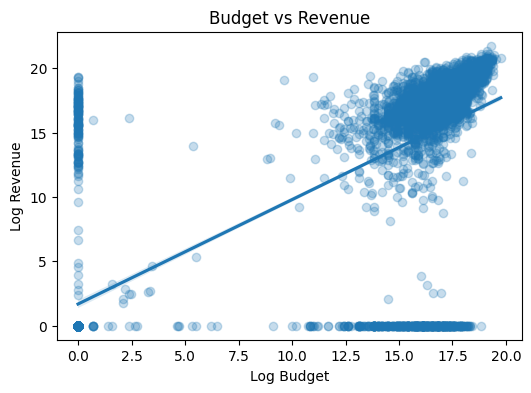

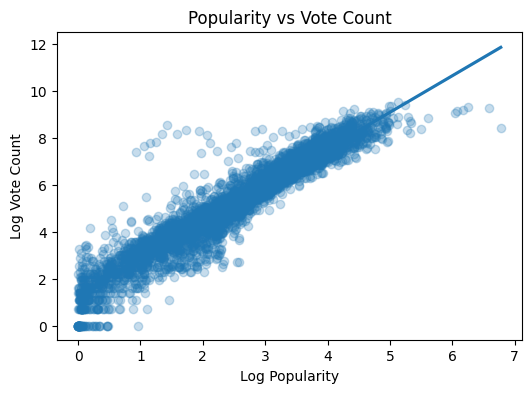

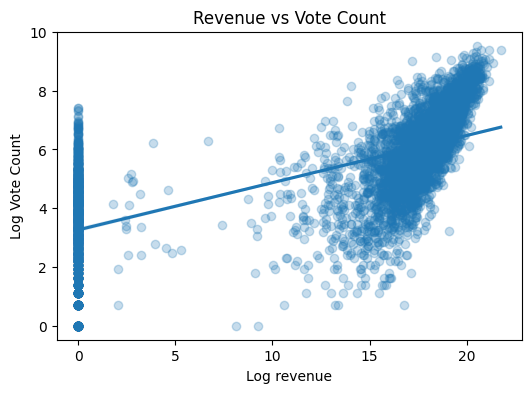

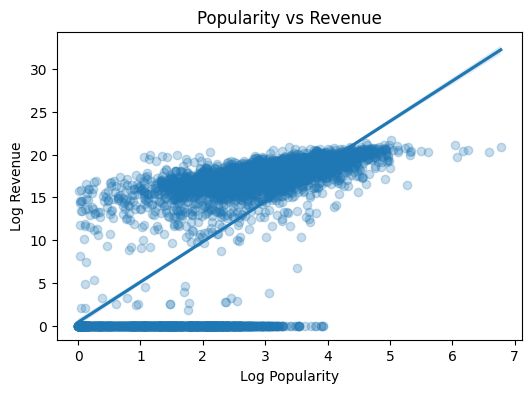

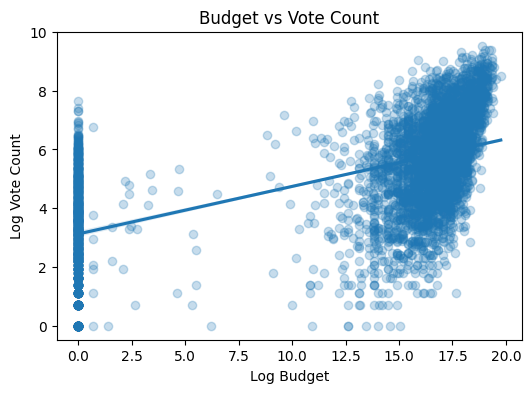

In [136]:
# Scatter plot: budget vs revenue
plt.figure(figsize=(6, 4))
sns.regplot(x = movies['log_budget'], y = movies['log_revenue'], data = movies, scatter_kws={'alpha':0.25})
plt.xlabel('Log Budget')
plt.ylabel('Log Revenue')
plt.title('Budget vs Revenue')

#R
plt.figure(figsize=(6, 4))
sns.regplot(x = movies['log_popularity'], y = movies['log_vote_count'], data = movies, scatter_kws={'alpha':0.25})
plt.xlabel('Log Popularity')
plt.ylabel('Log Vote Count')
plt.title('Popularity vs Vote Count')

plt.figure(figsize=(6, 4))
sns.regplot(x = movies['log_revenue'], y = movies['log_vote_count'], data = movies, scatter_kws={'alpha':0.25})
plt.xlabel('Log revenue')
plt.ylabel('Log Vote Count')
plt.title('Revenue vs Vote Count')

plt.figure(figsize=(6, 4))
sns.regplot(x = movies['log_popularity'], y = movies['log_revenue'], data = movies, scatter_kws={'alpha':0.25})
plt.xlabel('Log Popularity')
plt.ylabel('Log Revenue')
plt.title('Popularity vs Revenue')

plt.figure(figsize=(6, 4))
sns.regplot(x = movies['log_budget'], y = movies['log_vote_count'], data = movies, scatter_kws={'alpha':0.25})
plt.xlabel('Log Budget')
plt.ylabel('Log Vote Count')
plt.title('Budget vs Vote Count')
plt.show()

### Exploring the correlation further
Let's look at the correlation between these features using the .corr() method. 



Budget and Revenue have a correlation of 0.7, indicating a strong correlation. As shown in the regression plot, most of the data is in the high budget/high revenue area, indicating that a high budget does yield a high revenue. However, there are a lot of outliers in the data.

In [137]:
movies[['log_budget','log_revenue']].corr()

,log_budget,log_revenue
log_budget,1.000000,0.700067
log_revenue,0.700067,1.000000


Popularity and Vote Count have a correlation of 0.95, indicating an extremely strong positive relationship as shown in the regression plot. This indicates that as the popularity increases the vote count also increases.

In [138]:
movies[['log_popularity','log_vote_count']].corr()

,log_popularity,log_vote_count
log_popularity,1.000000,0.951147
log_vote_count,0.951147,1.000000


Revenue and Vote Count have a correlation of 0.69 indicating a strong positive relationship. From the regression plot we can see that the data is quite scattered and we have a lot of movies that have a revenue of 0, but have a high vote count. This could mean that the movies had an unknown revenue so we need to deal with these and re-run the regression plot.

In [139]:
movies[['log_revenue','log_vote_count']].corr()


,log_revenue,log_vote_count
log_revenue,1.000000,0.689381
log_vote_count,0.689381,1.000000


Popularity and Revenue have a correlation of 0.67 indicating a strong positive relationship. The majority of the revenue is between log10 and log20 with a number of movies having a popularity between 0 and 4 but have 0 revenue. Again, these could be the same movies that had an unknown revenue.

In [140]:
movies[['log_popularity','log_revenue']].corr()

,log_popularity,log_revenue
log_popularity,1.000000,0.669148
log_revenue,0.669148,1.000000


Budget and Vote Count/Budget and Popularity have a correlation of 0.6 indicating a moderately strong positive relationship. We can also see from the regression plot that there are a number of outliers, specifically where there is no budget. This could mean the budget wasn't known for those movies and so we need to deal with these and re-run the regression plot.

In [141]:
movies[['log_budget','log_vote_count']].corr()


,log_budget,log_vote_count
log_budget,1.000000,0.599215
log_vote_count,0.599215,1.000000


In [142]:
movies[['log_budget','log_popularity']].corr()


,log_budget,log_popularity
log_budget,1.000000,0.585196
log_popularity,0.585196,1.000000


We have establised that budget

### Categorical relationships using boxplots
We will now look at the categorical features and how they impact the features above.

I first want to find out what effect the language, status and genre has on the revenue and if there is any impact on the distribution

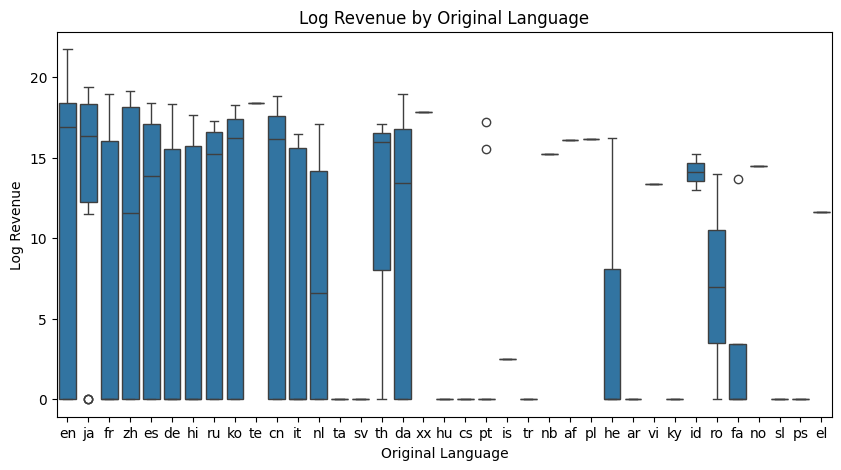

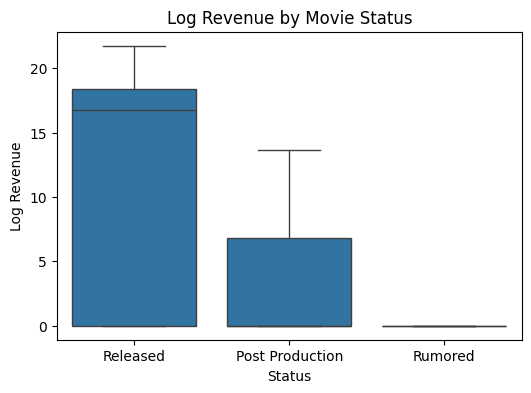

In [143]:
# Boxplot of revenue by original language
plt.figure(figsize=(10, 5))
sns.boxplot(x='original_language', y='log_revenue', data=movies)
plt.title('Log Revenue by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Log Revenue')
plt.show()

# Boxplot of revenue by movie status
plt.figure(figsize=(6, 4))
sns.boxplot(x='status', y='log_revenue', data=movies)
plt.title('Log Revenue by Movie Status')
plt.xlabel('Status')
plt.ylabel('Log Revenue')
plt.show()

### Dealing with multi-value columns
I ran into an issue where the genres, companies, keywords all have multiple values stored in dictionaries.
I will need to handle these and ensure each of these columns only have one value.

I will norm

In [144]:
movies.head()

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,...,status,title,vote_average,vote_count,log_budget,log_popularity,log_revenue,log_vote_count,profit,popularity_per_vote
0,Medium,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Low,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,High,162.0,...,Released,Avatar,7.2,High,19.283571,5.020174,21.748578,9.375940,11.763566,0.012749
1,High,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Low,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,Medium,169.0,...,Released,Pirates of the Caribbean: At World's End,6.9,Low,19.519293,4.942232,20.683485,8.412055,3.203333,0.030907
2,Medium,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Low,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,Low,148.0,...,Released,Spectre,6.3,Low,19.316769,4.685614,20.596199,8.404472,3.594590,0.024043
3,Medium,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Low,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,Medium,165.0,...,Released,The Dark Knight Rises,7.6,Medium,19.336971,4.730153,20.804790,9.116799,4.339756,0.012334
4,High,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,Low,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,Low,132.0,...,Released,John Carter,6.1,Low,19.376192,3.805039,19.464974,7.661527,1.092843,0.020681


In [145]:
#check data type of genres row
type(movies['genres'].iloc[0])

str

Below is the code created to extract the primary_genres from the genres column.

In [146]:
primary_genres = []
for row in movies['genres']:
    #replace science with science fiction to counteract the two words being split
    r = row.strip().replace("Science","Science-Fiction").split()
    try:
        #replace punctuation
        primary_genre = r[3].replace('},',"").replace('"',"").replace('}]',"").strip()
        primary_genres.append(primary_genre)
    except IndexError:
        primary_genres.append(None)

movies['primary_genre'] = primary_genres
movies[['primary_genre']]


,primary_genre
0,Action
1,Adventure
2,Action
3,Action
4,Action
...,...
4798,Action
4799,Comedy
4800,Comedy
4801,None


In [147]:
movies.head(1)

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,...,title,vote_average,vote_count,log_budget,log_popularity,log_revenue,log_vote_count,profit,popularity_per_vote,primary_genre
0,Medium,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Low,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,High,162.0,...,Avatar,7.2,High,19.283571,5.020174,21.748578,9.37594,11.763566,0.012749,Action


I will now replicate this for the other columns with lists of dictionaries (which are essentially JSON strings)   

In [148]:
primary_countries = []
for row in movies['production_countries']:
    r = row.strip().split()
    try:
        primary_country = r[1].replace('"',"").replace(',',"")
        primary_countries.append(primary_country)
    except IndexError:
        primary_countries.append(None)

movies['primary_country'] = primary_countries
movies[['primary_country']]

,primary_country
0,US
1,US
2,GB
3,US
4,US
...,...
4798,MX
4799,None
4800,US
4801,US


In [149]:
movies.head(1)

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,...,vote_average,vote_count,log_budget,log_popularity,log_revenue,log_vote_count,profit,popularity_per_vote,primary_genre,primary_country
0,Medium,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Low,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,High,162.0,...,7.2,High,19.283571,5.020174,21.748578,9.37594,11.763566,0.012749,Action,US


For the production companies, we cannot simply discard the companies besides the first one as there is no particular order. However, there are some films with as many as 20 companies in the dataset. Therefore, I decided to take the first 3 companies for each row and split them into three separate columns: company 1, company 2 and company 3.

I tested some of the high popularity movies to confirm if the first company wasn't always the "biggest contributor" and it confirmed this. For example, 20th Century Fox was the biggest contributor to Avatar but it is listed as the second company.

In [150]:
movies[["title","production_companies"]].loc[movies['popularity'] == "High"].head(5)

,title,production_companies
95,Interstellar,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na..."
546,Minions,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n..."


Now I will extract the first three companies for each movie. If a movie doesn't have three companies, then the empty column will have "None"

In [151]:
def extract_first_three_companies(row):
    # Find all company names in the string
    companies = re.findall(r'"name": ?"([^"]+)"', row)
    # Return only the first three (or less if not enough companies)
    return companies[:3] + [None] * (3 - len(companies))  # pad with None if less than 3

# Apply the function to get a list of up to 3 company names for each row
company_lists = movies['production_companies'].apply(extract_first_three_companies)

# Convert the lists to a DataFrame, expanding each list into three columns
primary_companies = pd.DataFrame(company_lists.tolist(), columns=['company_1', 'company_2', 'company_3'])

# Concatenate with the original DataFrame if you want
movies = pd.concat([movies, primary_companies], axis=1)

In [152]:
movies.head(10)

,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,...,log_popularity,log_revenue,log_vote_count,profit,popularity_per_vote,primary_genre,primary_country,company_1,company_2,company_3
0,Medium,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Low,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,High,162.0,...,5.020174,21.748578,9.375940,11.763566,0.012749,Action,US,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment
1,High,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Low,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,Medium,169.0,...,4.942232,20.683485,8.412055,3.203333,0.030907,Adventure,US,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions
2,Medium,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Low,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,Low,148.0,...,4.685614,20.596199,8.404472,3.594590,0.024043,Action,GB,Columbia Pictures,Danjaq,B24
3,Medium,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Low,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,Medium,165.0,...,4.730153,20.804790,9.116799,4.339756,0.012334,Action,US,Legendary Pictures,Warner Bros.,DC Entertainment
4,High,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,Low,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,Low,132.0,...,3.805039,19.464974,7.661527,1.092843,0.020681,Action,US,Walt Disney Pictures,None,None
5,High,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...","[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Low,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,Low,139.0,...,4.759605,20.607711,8.182280,3.452991,0.032355,Fantasy,US,Columbia Pictures,Laura Ziskin Productions,Marvel Enterprises
6,High,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Low,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,Low,100.0,...,3.905642,20.198671,8.111028,2.276134,0.014619,Animation,US,Walt Disney Pictures,Walt Disney Animation Studios,None
7,High,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Low,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,Medium,141.0,...,4.907341,21.063590,8.819961,5.019299,0.019843,Action,US,Marvel Studios,Prime Focus,Revolution Sun Studios
8,Medium,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...",en,Low,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,Medium,153.0,...,4.604026,20.654943,8.574329,3.735837,0.018682,Adventure,GB,Warner Bros.,Heyday Films,None
9,Medium,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 7002...",en,Low,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United State

Spoken languages column

In [153]:
movies[['spoken_languages']].head(20)
#testing to see if first language is primary language

,spoken_languages
0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..."
1,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
2,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},..."
3,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
4,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
5,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..."
6,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
7,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
8,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
9,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"


The keywords column also faces a similar problem as there are often many keywords for a movie, as shown below

In [154]:
"""pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)"""

"pd.set_option('display.max_colwidth', None)\npd.set_option('display.max_columns', None)"

In [155]:
movies['keywords'].iloc[0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

As there are so many possible keywords and just simply taking the fitrst few rfrom each movie wouldn't represent the data well. The same goes for the spoken_languages column.

I will deal with these columns later when needed for analysis.

note: use keyword frequencies and then extract most frequent keywords for each movie?

The previous columns that had multiple values can now be dropped to make the dataset cleaner and easier to use

In [156]:
columns = ["genres","production_companies","production_countries"]
movies = movies.drop(columns, axis = 1)

Creating a movies1 dataframe to work without the keywords and spoken languages columns.

In [157]:
columns2 = ["keywords","spoken_languages"]
movies1 = movies.drop(columns2, axis = 1)
movies1.head()

,budget,original_language,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,...,log_popularity,log_revenue,log_vote_count,profit,popularity_per_vote,primary_genre,primary_country,company_1,company_2,company_3
0,Medium,en,Low,2009-12-10,High,162.0,Released,Avatar,7.2,High,...,5.020174,21.748578,9.375940,11.763566,0.012749,Action,US,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment
1,High,en,Low,2007-05-19,Medium,169.0,Released,Pirates of the Caribbean: At World's End,6.9,Low,...,4.942232,20.683485,8.412055,3.203333,0.030907,Adventure,US,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions
2,Medium,en,Low,2015-10-26,Low,148.0,Released,Spectre,6.3,Low,...,4.685614,20.596199,8.404472,3.594590,0.024043,Action,GB,Columbia Pictures,Danjaq,B24
3,Medium,en,Low,2012-07-16,Medium,165.0,Released,The Dark Knight Rises,7.6,Medium,...,4.730153,20.804790,9.116799,4.339756,0.012334,Action,US,Legendary Pictures,Warner Bros.,DC Entertainment
4,High,en,Low,2012-03-07,Low,132.0,Released,John Carter,6.1,Low,...,3.805039,19.464974,7.661527,1.092843,0.020681,Action,US,Walt Disney Pictures,None,None


In [158]:
movies1.isnull().sum()

budget                    4
original_language         4
popularity                4
release_date              4
revenue                   4
runtime                   4
status                    4
title                     4
vote_average              4
vote_count                4
log_budget                4
log_popularity            4
log_revenue               4
log_vote_count            4
profit                 1040
popularity_per_vote      64
primary_genre            31
primary_country         176
company_1               353
company_2              1417
company_3              2479
dtype: int64

### Reindexing columns
I will now reindex the columns to ensure similar features are next to each other. For example, title as index 0 and genre index 1. This will help in reading and analysing the dataframe better.

In [159]:
new_column_order = [
    'title',
    'primary_genre',
    'original_language',
    'primary_country',
    'status',
    'company_1', 'company_2', 'company_3',
    'budget', 'revenue', 'popularity', 'vote_count', 'vote_average', 'runtime',
    'log_budget', 'log_revenue', 'log_popularity', 'log_vote_count',
    'profit', 'popularity_per_vote'
]

new_column_order = [col for col in new_column_order if col in movies1.columns]
movies1 = movies1.reindex(columns=new_column_order)

movies1.head()

,title,primary_genre,original_language,primary_country,status,company_1,company_2,company_3,budget,revenue,popularity,vote_count,vote_average,runtime,log_budget,log_revenue,log_popularity,log_vote_count,profit,popularity_per_vote
0,Avatar,Action,en,US,Released,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,Medium,High,Low,High,7.2,162.0,19.283571,21.748578,5.020174,9.375940,11.763566,0.012749
1,Pirates of the Caribbean: At World's End,Adventure,en,US,Released,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions,High,Medium,Low,Low,6.9,169.0,19.519293,20.683485,4.942232,8.412055,3.203333,0.030907
2,Spectre,Action,en,GB,Released,Columbia Pictures,Danjaq,B24,Medium,Low,Low,Low,6.3,148.0,19.316769,20.596199,4.685614,8.404472,3.594590,0.024043
3,The Dark Knight Rises,Action,en,US,Released,Legendary Pictures,Warner Bros.,DC Entertainment,Medium,Medium,Low,Medium,7.6,165.0,19.336971,20.804790,4.730153,9.116799,4.339756,0.012334
4,John Carter,Action,en,US,Released,Walt Disney Pictures,None,None,High,Low,Low,Low,6.1,132.0,19.376192,19.464974,3.805039,7.661527,1.092843,0.020681


Renaming the columns for easier indexing

In [160]:
movies1 = movies1.rename(columns={'primary_genre':'genre','primary_country':'country'})

Sorting the data to look at trends in the top 10 revenues, popularity etc before modelling

In [161]:
movies1.sort_values(by=['log_revenue','log_popularity'], axis = 0, ascending = False).head(10)

,title,genre,original_language,country,status,company_1,company_2,company_3,budget,revenue,popularity,vote_count,vote_average,runtime,log_budget,log_revenue,log_popularity,log_vote_count,profit,popularity_per_vote
0,Avatar,Action,en,US,Released,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,Medium,High,Low,High,7.2,162.0,19.283571,21.748578,5.020174,9.375940,11.763566,0.012749
25,Titanic,Drama,en,US,Released,Paramount Pictures,Twentieth Century Fox Film Corporation,Lightstorm Entertainment,Medium,Medium,Low,Medium,7.5,194.0,19.113828,21.335764,4.615377,8.931023,9.225171,0.013227
16,The Avengers,Science-Fiction,en,US,Released,Paramount Pictures,Marvel Studios,None,Medium,Medium,Low,High,7.4,143.0,19.209138,21.141685,4.979823,9.373904,6.907081,0.012266
28,Jurassic World,Action,en,US,Released,Universal Studios,Amblin Entertainment,Legendary Pictures,Medium,Medium,Medium,Medium,6.5,124.0,18.826146,21.137710,6.039561,9.066816,10.090192,0.048339
44,Furious 7,Action,en,JP,Released,Universal Pictures,Original Film,Fuji Television Network,Medium,Medium,Low,Low,7.3,137.0,19.062535,21.132889,4.637852,8.337349,7.927628,0.024502
7,Avengers: Age of Ultron,Action,en,US,Released,Marvel Studios,Prime Focus,Revolution Sun Studios,High,Medium,Low,Medium,7.3,141.0,19.450300,21.063590,4.907341,8.819961,5.019299,0.019843
124,Frozen,Animation,en,US,Released,Walt Disney Pictures,Walt Disney Animation Studios,None,Medium,Medium,Low,Medium,7.3,102.0,18.826146,20.965599,5.112743,8.574707,8.494793,0.031185
31,Iron Man 3,Action,en,CN,Released,Marvel Studios,None,None,Medium,Medium,Low,Medium,6.8,130.0,19.113828,20.918372,4.365415,9.083302,6.077200,0.008821
546,Minions,Family,en,US,Released,Universal Pictures,Illumination Entertainment,None,Low,Medium,High,Low,6.4,91.0,18.119576,20.868864,6.776029,8.427706,15.631499,0.191551
26,Captain America: Civil War,Adventure,en,US,Released,Studio Babelsberg,Marvel Studios,Walt Disney Studios Motion Pictures,Medium,Medium,Low,Medium,7.1,147.0,19.336971,20.865897,5.295174,8.887653,4.613218,0.027396


In [162]:
movies1.sort_values(by=['log_popularity'], axis = 0, ascending = False).head(10)


,title,genre,original_language,country,status,company_1,company_2,company_3,budget,revenue,popularity,vote_count,vote_average,runtime,log_budget,log_revenue,log_popularity,log_vote_count,profit,popularity_per_vote
546,Minions,Family,en,US,Released,Universal Pictures,Illumination Entertainment,None,Low,Medium,High,Low,6.4,91.0,18.119576,20.868864,6.776029,8.427706,15.631499,0.191551
95,Interstellar,Adventure,en,CA,Released,Paramount Pictures,Legendary Pictures,Warner Bros.,Medium,Low,High,High,8.1,169.0,18.921456,20.330401,6.586513,9.293578,4.091636,0.066647
788,Deadpool,Action,en,US,Released,Twentieth Century Fox Film Corporation,Marvel Entertainment,The Donners' Company,Low,Low,Medium,High,7.4,108.0,17.875954,20.478788,6.245273,9.305287,13.501948,0.046800
94,Guardians of the Galaxy,Action,en,GB,Released,Marvel Studios,Moving Picture Company (MPC),Bulletproof Cupid,Medium,Low,Medium,High,7.9,121.0,18.951309,20.466215,6.178149,9.184304,4.548992,0.049384
127,Mad Max: Fury Road,Action,en,AU,Released,Village Roadshow Pictures,Kennedy Miller Productions,Warner Bros.,Medium,Low,Medium,High,7.2,120.0,18.826146,19.752673,6.075986,9.151439,2.525722,0.046068
28,Jurassic World,Action,en,US,Released,Universal Studios,Amblin Entertainment,Legendary Pictures,Medium,Medium,Medium,Medium,6.5,124.0,18.826146,21.137710,6.039561,9.066816,10.090192,0.048339
199,Pirates of the Caribbean: The Curse of the Bla...,Adventure,en,US,Released,Walt Disney Pictures,Jerry Bruckheimer Films,None,Medium,Low,Low,Medium,7.5,143.0,18.757153,20.300163,5.609372,8.851663,4.678652,0.038937
82,Dawn of the Planet of the Apes,Science-Fiction,en,US,Released,Ingenious Media,Chernin Entertainment,TSG Entertainment,Medium,Low,Low,Low,7.3,130.0,18.951309,20.381683,5.500408,8.391857,4.180262,0.055282
200,The Hunger Games: Mockingjay - Part 1,Science-Fiction,en,US,Released,Lionsgate,Color Force,None,Low,Low,Low,Medium,6.6,123.0,18.643824,20.438380,5.333816,8.627840,6.016802,0.036932
88,Big Hero 6,Adventure,en,US,Released,Walt Disney Pictures,Walt Disney Animation Studios,None,Medium,Low,Low,Medium,7.8,102.0,18.921456,20.295717,5.321714,8.721928,3.952154,0.033209


#### EDA on movies1 dataframe

In [163]:
movies1.describe(include = "all")

,title,genre,original_language,country,status,company_1,company_2,company_3,budget,revenue,popularity,vote_count,vote_average,runtime,log_budget,log_revenue,log_popularity,log_vote_count,profit,popularity_per_vote
count,4799,4772,4799,4627,4799,4450,3386,2324,4799,4799,4799,4799,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,3.763000e+03,4739.000000
unique,4796,20,37,70,3,1311,1613,1440,3,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,The Host,Drama,en,US,Released,Paramount Pictures,Warner Bros.,Warner Bros.,Low,Low,Low,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,1206,4503,3102,4791,281,101,85,4595,4769,4793,4692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.094186,106.903105,13.006131,12.230954,2.518700,5.226300,2.535509e+03,0.070713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.188340,22.561305,7.038958,8.152847,1.159864,1.900486,1.395158e+05,0.083942
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000372,0.000000,0.000000e+00,0.000124
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.600000,94.000000,13.592368,0.000000,1.737927,4.007333,4.927037e-01,0.037014
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.200000,103.000000,16.523561,16.769588,2.634011,5.468060,1.869407e+00,0.051267
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.800000,118.000000,17.504390,18.347642,3.379317,6.604621,3.945042e+00,0.074737


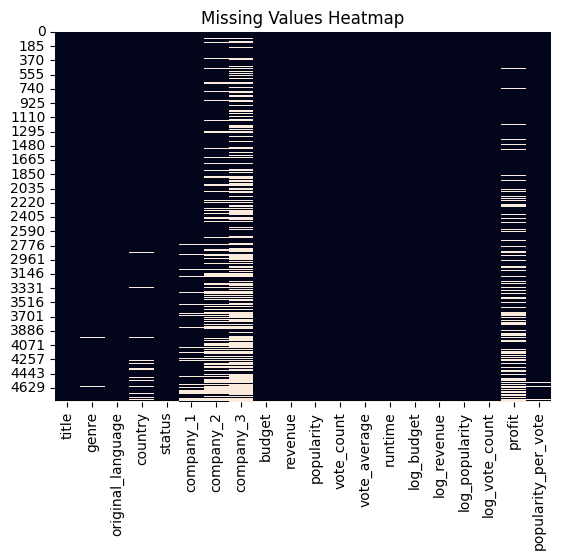

In [164]:
sns.heatmap(movies1.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [165]:
print(movies1.isnull().sum())

title                     4
genre                    31
original_language         4
country                 176
status                    4
company_1               353
company_2              1417
company_3              2479
budget                    4
revenue                   4
popularity                4
vote_count                4
vote_average              4
runtime                   4
log_budget                4
log_revenue               4
log_popularity            4
log_vote_count            4
profit                 1040
popularity_per_vote      64
dtype: int64


In [166]:
movies1[movies1['title'].isnull()]

,title,genre,original_language,country,status,company_1,company_2,company_3,budget,revenue,popularity,vote_count,vote_average,runtime,log_budget,log_revenue,log_popularity,log_vote_count,profit,popularity_per_vote
2656,NaN,NaN,NaN,NaN,NaN,JCE Movies,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4140,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4431,NaN,NaN,NaN,NaN,NaN,Saga Film,Mobra Films,Mindshare Media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4553,NaN,NaN,NaN,NaN,NaN,Triple D Productions,CalTex Films,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop null title rows

In [167]:
movies1 = movies1.dropna(subset = "title")

Distribution of primary genre

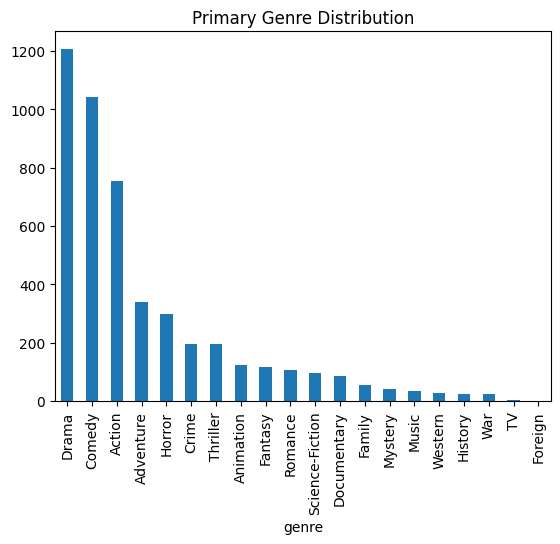

In [168]:
movies1['genre'].value_counts().plot(kind='bar', title='Primary Genre Distribution')
plt.show()

The primary genre distribution matches with the previous distribution of the original dataframe as expected. Drama, Comedy and Action make up the majority of genres.

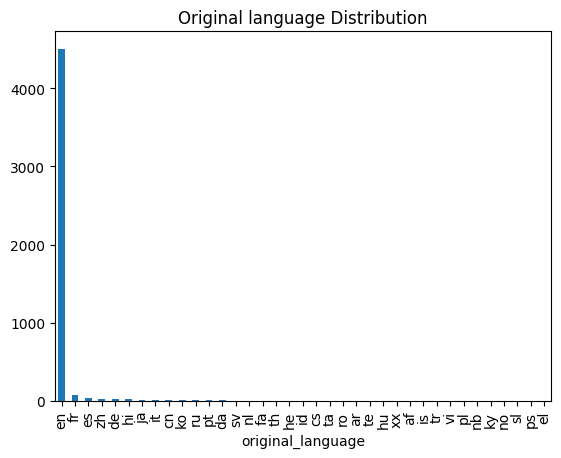

In [169]:
movies1['original_language'].value_counts().plot(kind='bar', title='Original language Distribution')
plt.show()

As expected, English is the predominant language and so we can safely ignore this column in our analysis as it is very skewed.

## Revisiting the correlation
Let's revisit the correlation of our numerical values

As mentioned before I need to deal with the 0 valued data (budget and revenue). I plan to do this by replacing any 0 values with the mean of budget/column of similarly popular + same genre films.

In [170]:
# Replace 0s in log_budget and log_revenue with NaN for easier processing
movies1['log_budget'] = movies1['log_budget'].replace(0, np.nan)
movies1['log_revenue'] = movies1['log_revenue'].replace(0, np.nan)

# Define a function to fill NaN with group mean
def fill_with_group_mean(df, value_col, group_cols):
    return df.groupby(group_cols)[value_col].transform(lambda x: x.fillna(x.mean()))

# Fill missing log_budget and log_revenue using mean of same primary_genre and log_popularity
movies1['log_budget'] = fill_with_group_mean(movies1, 'log_budget', ['genre', 'log_popularity'])
movies1['log_revenue'] = fill_with_group_mean(movies1, 'log_revenue', ['genre', 'log_popularity'])

# If any NaNs remain (e.g., if a group is all NaN), fill with overall mean as fallback
movies1['log_budget'] = movies1['log_budget'].fillna(movies1['log_budget'].mean())
movies1['log_revenue'] = movies1['log_revenue'].fillna(movies1['log_revenue'].mean())

Now we can look at the correlation heatmap again and see if the correlation has changed

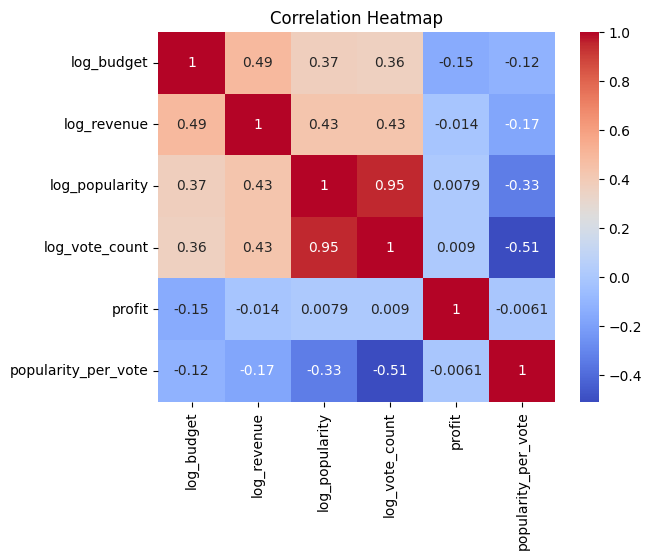

In [171]:
sns.heatmap(movies1[['log_budget', 'log_revenue', 'log_popularity', 'log_vote_count', 'profit', 'popularity_per_vote']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

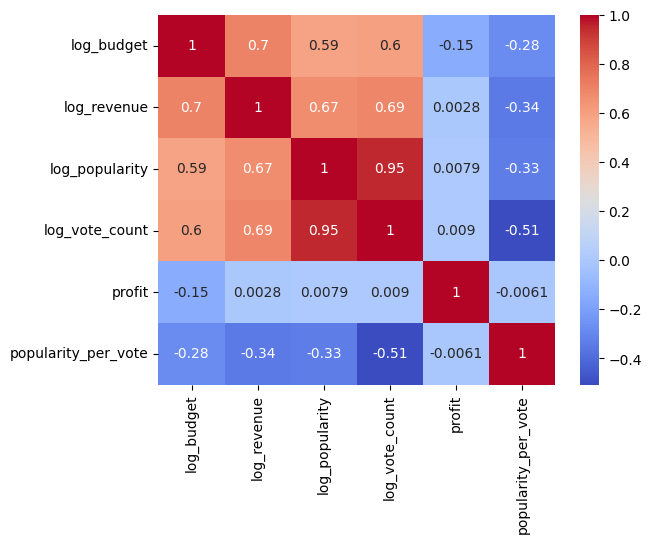

In [172]:
sns.heatmap(movies[['log_budget', 'log_revenue', 'log_popularity', 'log_vote_count', 'profit', 'popularity_per_vote']].corr(), annot=True, cmap='coolwarm')

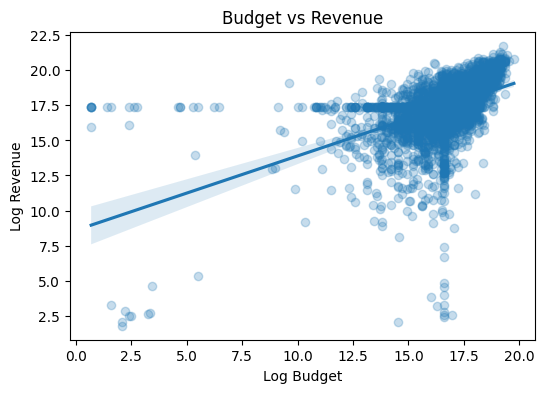

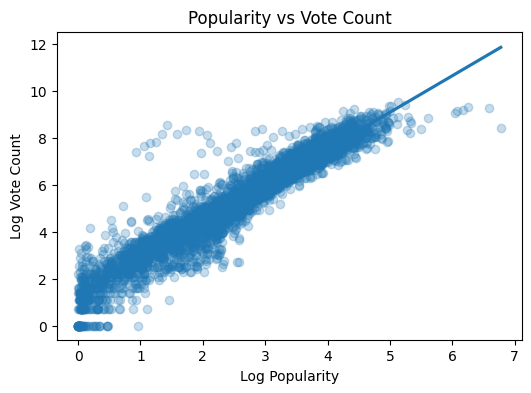

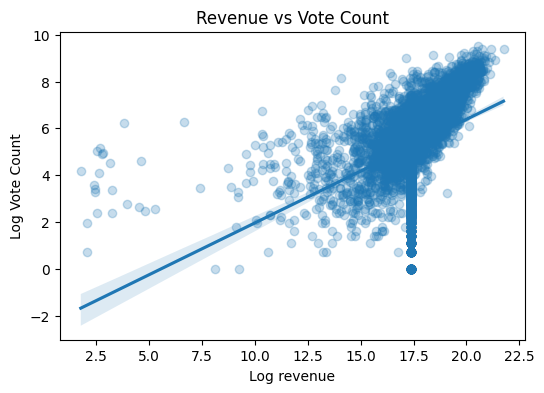

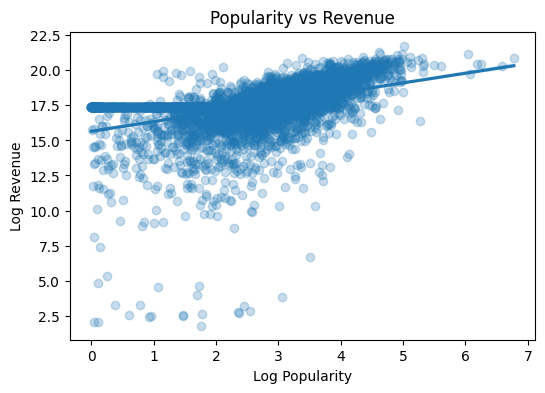

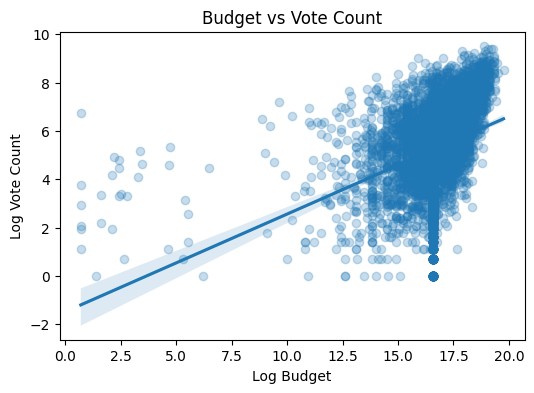

Text(0.5, 1.0, 'Popularity per vote vs Vote Count')

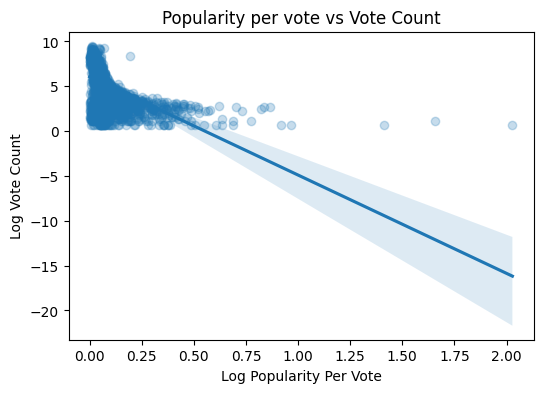

In [173]:
plt.figure(figsize=(6, 4))
sns.regplot(x = movies1['log_budget'], y = movies1['log_revenue'], data = movies1, scatter_kws={'alpha':0.25})
plt.xlabel('Log Budget')
plt.ylabel('Log Revenue')
plt.title('Budget vs Revenue')

#R
plt.figure(figsize=(6, 4))
sns.regplot(x = movies1['log_popularity'], y = movies1['log_vote_count'], data = movies1, scatter_kws={'alpha':0.25})
plt.xlabel('Log Popularity')
plt.ylabel('Log Vote Count')
plt.title('Popularity vs Vote Count')

plt.figure(figsize=(6, 4))
sns.regplot(x = movies1['log_revenue'], y = movies1['log_vote_count'], data = movies1, scatter_kws={'alpha':0.25})
plt.xlabel('Log revenue')
plt.ylabel('Log Vote Count')
plt.title('Revenue vs Vote Count')

plt.figure(figsize=(6, 4))
sns.regplot(x = movies1['log_popularity'], y = movies1['log_revenue'], data = movies1, scatter_kws={'alpha':0.25})
plt.xlabel('Log Popularity')
plt.ylabel('Log Revenue')
plt.title('Popularity vs Revenue')

plt.figure(figsize=(6, 4))
sns.regplot(x = movies1['log_budget'], y = movies1['log_vote_count'], data = movies1, scatter_kws={'alpha':0.25})
plt.xlabel('Log Budget')
plt.ylabel('Log Vote Count')
plt.title('Budget vs Vote Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.regplot(x = movies1['popularity_per_vote'], y = movies1['log_vote_count'], data = movies1, scatter_kws={'alpha':0.25})
plt.xlabel('Log Popularity Per Vote')
plt.ylabel('Log Vote Count')
plt.title('Popularity per vote vs Vote Count')

Let's look also at the boxplots of genre and revenue, seeing the distribution of revenue for each genre

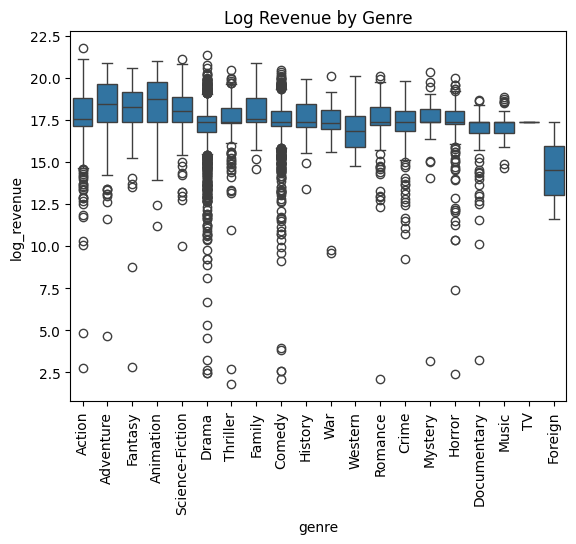

In [174]:
sns.boxplot(x='genre', y='log_revenue', data=movies1)
plt.xticks(rotation=90)
plt.title('Log Revenue by Genre')
plt.show()

Let's look at the boxplot between some more categorical variables.

In [175]:
movies1.dtypes

title                    object
genre                    object
original_language        object
country                  object
status                   object
company_1                object
company_2                object
company_3                object
budget                 category
revenue                category
popularity             category
vote_count             category
vote_average            float64
runtime                 float64
log_budget              float64
log_revenue             float64
log_popularity          float64
log_vote_count          float64
profit                  float64
popularity_per_vote     float64
dtype: object

As we are predicting movie success, I will focus on revenue as the target variable

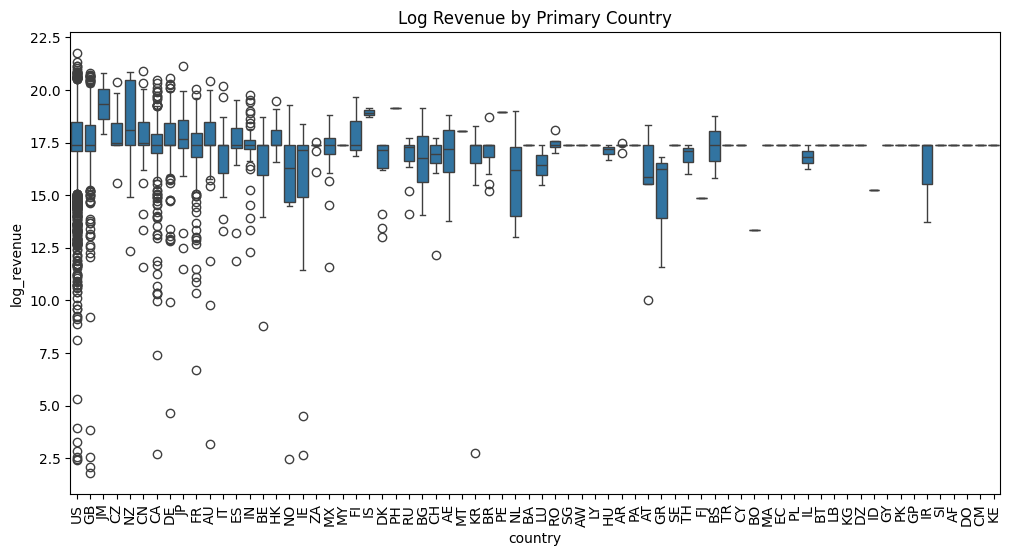

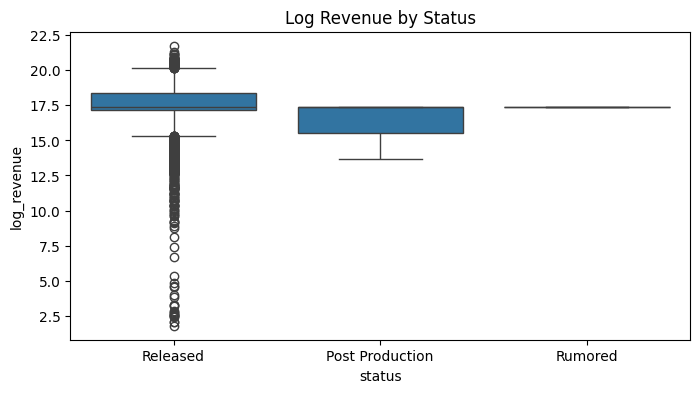

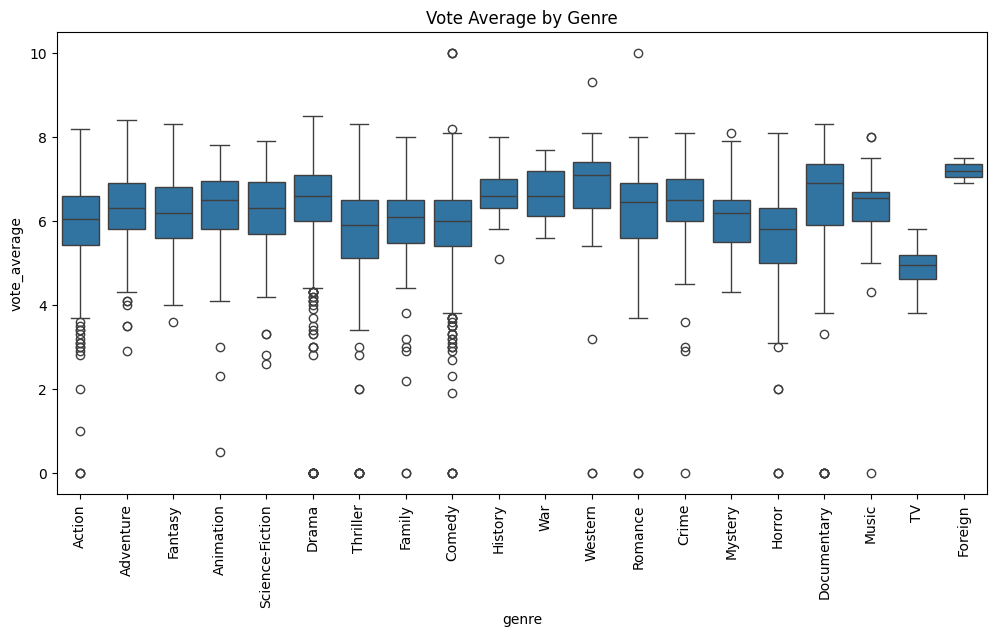

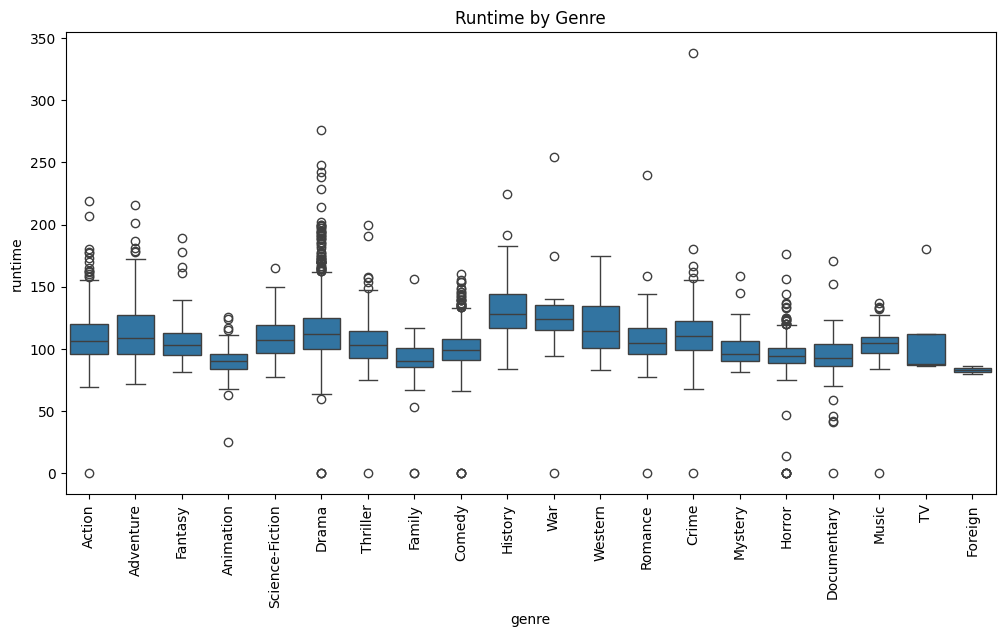

In [176]:
# Boxplot: Revenue by country
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='log_revenue', data=movies1)
plt.xticks(rotation=90)
plt.title('Log Revenue by Primary Country')
plt.show()

# Boxplot: Revenue by Status (e.g., Released, Post Production)
plt.figure(figsize=(8, 4))
sns.boxplot(x='status', y='log_revenue', data=movies1)
plt.title('Log Revenue by Status')
plt.show()

# Boxplot: Vote Average by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='vote_average', data=movies1)
plt.xticks(rotation=90)
plt.title('Vote Average by Genre')
plt.show()

# Boxplot: Runtime by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='runtime', data=movies1)
plt.xticks(rotation=90)
plt.title('Runtime by Genre')
plt.show()

The genre has some clear differences between the boxes, for example Action and Animation. However there is a lot of overlap. We may be able to use genre in a multiple feature regression model.

Lets analyse further into the revenue grouped by country to see whether it is a good predictor

In [177]:
movies1['country'].value_counts().to_frame()

,count
country,
US,3102
GB,373
CA,220
DE,200
FR,174
...,...
SI,1
AF,1
DO,1


Most of the data is based in US, so country would not be a good indicator for revenue since the data is highly skewed.

Top Companies - which companies are the most frequent in the dataset?


In [183]:
top_companies = pd.concat([movies1['company_1'], movies1['company_2'], movies1['company_3']]).value_counts().dropna().head(10)

print("Top 10 companies:")
print(top_companies)

Top 10 companies:
Universal Pictures                        311
Paramount Pictures                        285
Warner Bros.                              251
Twentieth Century Fox Film Corporation    220
Columbia Pictures                         201
New Line Cinema                           165
Walt Disney Pictures                      114
Touchstone Pictures                       100
Metro-Goldwyn-Mayer (MGM)                 100
Columbia Pictures Corporation              96
Name: count, dtype: int64


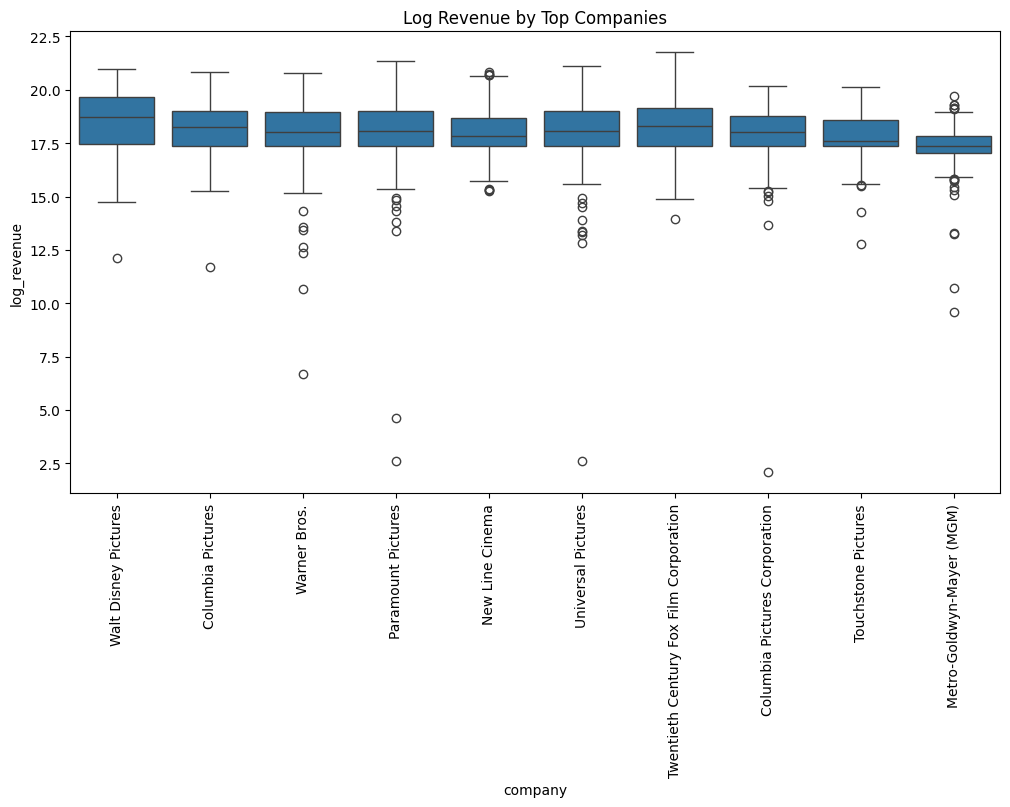

In [184]:
# Combine company columns into one for comparison
company_revenue = pd.concat([
    movies1[['company_1', 'log_revenue']].rename(columns={'company_1': 'company'}),
    movies1[['company_2', 'log_revenue']].rename(columns={'company_2': 'company'}),
    movies1[['company_3', 'log_revenue']].rename(columns={'company_3': 'company'})
])

top_companies = company_revenue['company'].value_counts().head(10).index
filtered_company = company_revenue[company_revenue['company'].isin(top_companies)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='company', y='log_revenue', data=filtered_company)
plt.xticks(rotation = 90)
plt.title('Log Revenue by Top Companies')
plt.show()

There is a lot of overlap between the boxes, so it looks like company is not a good predictor for revenue

The boxplots all show a lot of overlapping, indicating the categorical variables used for revenue are not suitable to be used alone. I will probably have to combine these features using multivariate regression.

The regression plots that were done earlier also indicate some of the relationships are not linear. We may have to use polynomials in the regression models to achieve better results.

In [185]:
movies1.columns

Index(['title', 'genre', 'original_language', 'country', 'status', 'company_1',
       'company_2', 'company_3', 'budget', 'revenue', 'popularity',
       'vote_count', 'vote_average', 'runtime', 'log_budget', 'log_revenue',
       'log_popularity', 'log_vote_count', 'profit', 'popularity_per_vote'],
      dtype='object')

Investigating genre further using grouping

In [186]:
movies1["genre"].unique()
group1 = movies1[["genre","log_budget","log_revenue","log_popularity"]]
group_test_1 = group1.groupby(["genre"], as_index=False).mean()
group_test_1


,genre,log_budget,log_revenue,log_popularity
0,Action,17.197898,17.712380,2.841179
1,Adventure,17.398288,18.274417,3.157718
2,Animation,17.638467,18.475874,3.171778
3,Comedy,16.465788,17.272572,2.320607
4,Crime,16.417100,17.139586,2.593540
5,Documentary,15.243793,16.499968,1.070797
6,Drama,16.263372,16.992621,2.270614
7,Family,17.168503,18.034634,2.444930
8,Fantasy,17.202023,17.995134,3.173301
9,Foreign,14.458565,14.503629,0.070601


The grouping reveals some interesting data. The revenue and budget are largely very similar so these features do not show a relationship with a specific genre. However, the popularity differs between each genre. It is worth exploring this relationship in more detail.


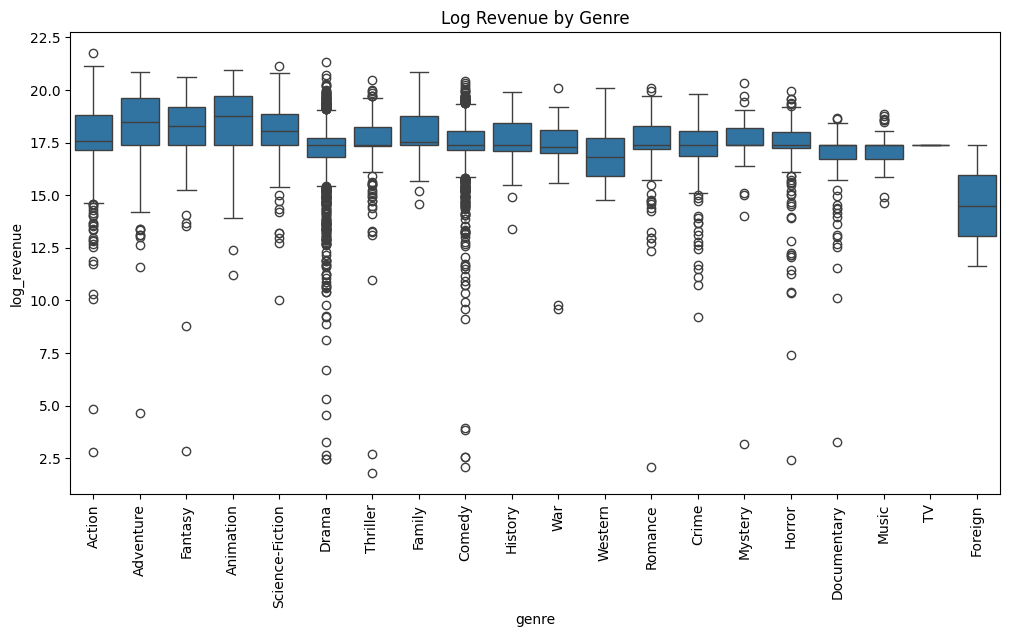

In [189]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='log_revenue', data=movies1)
plt.xticks(rotation = 90)
plt.title('Log Revenue by Genre')
plt.show()

### Revisiting statistic analysis


In [ ]:
movies1.describe()

,vote_average,runtime,log_budget,log_revenue,log_popularity,log_vote_count,profit,popularity_per_vote
count,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,3.763000e+03,4739.000000
mean,6.094186,106.903105,16.593270,17.387265,2.518700,5.226300,2.535509e+03,0.070713
std,1.188340,22.561305,1.705306,1.843450,1.159864,1.900486,1.395158e+05,0.083942
min,0.000000,0.000000,0.693147,1.791759,0.000372,0.000000,0.000000e+00,0.000124
25%,5.600000,94.000000,16.300417,17.133579,1.737927,4.007333,4.927037e-01,0.037014
50%,6.200000,103.000000,16.593270,17.387265,2.634011,5.468060,1.869407e+00,0.051267
75%,6.800000,118.000000,17.504390,18.347642,3.379317,6.604621,3.945042e+00,0.074737
max,10.000000,338.000000,19.755682,21.748578,6.776029,9.529012,8.500000e+06,2.028170


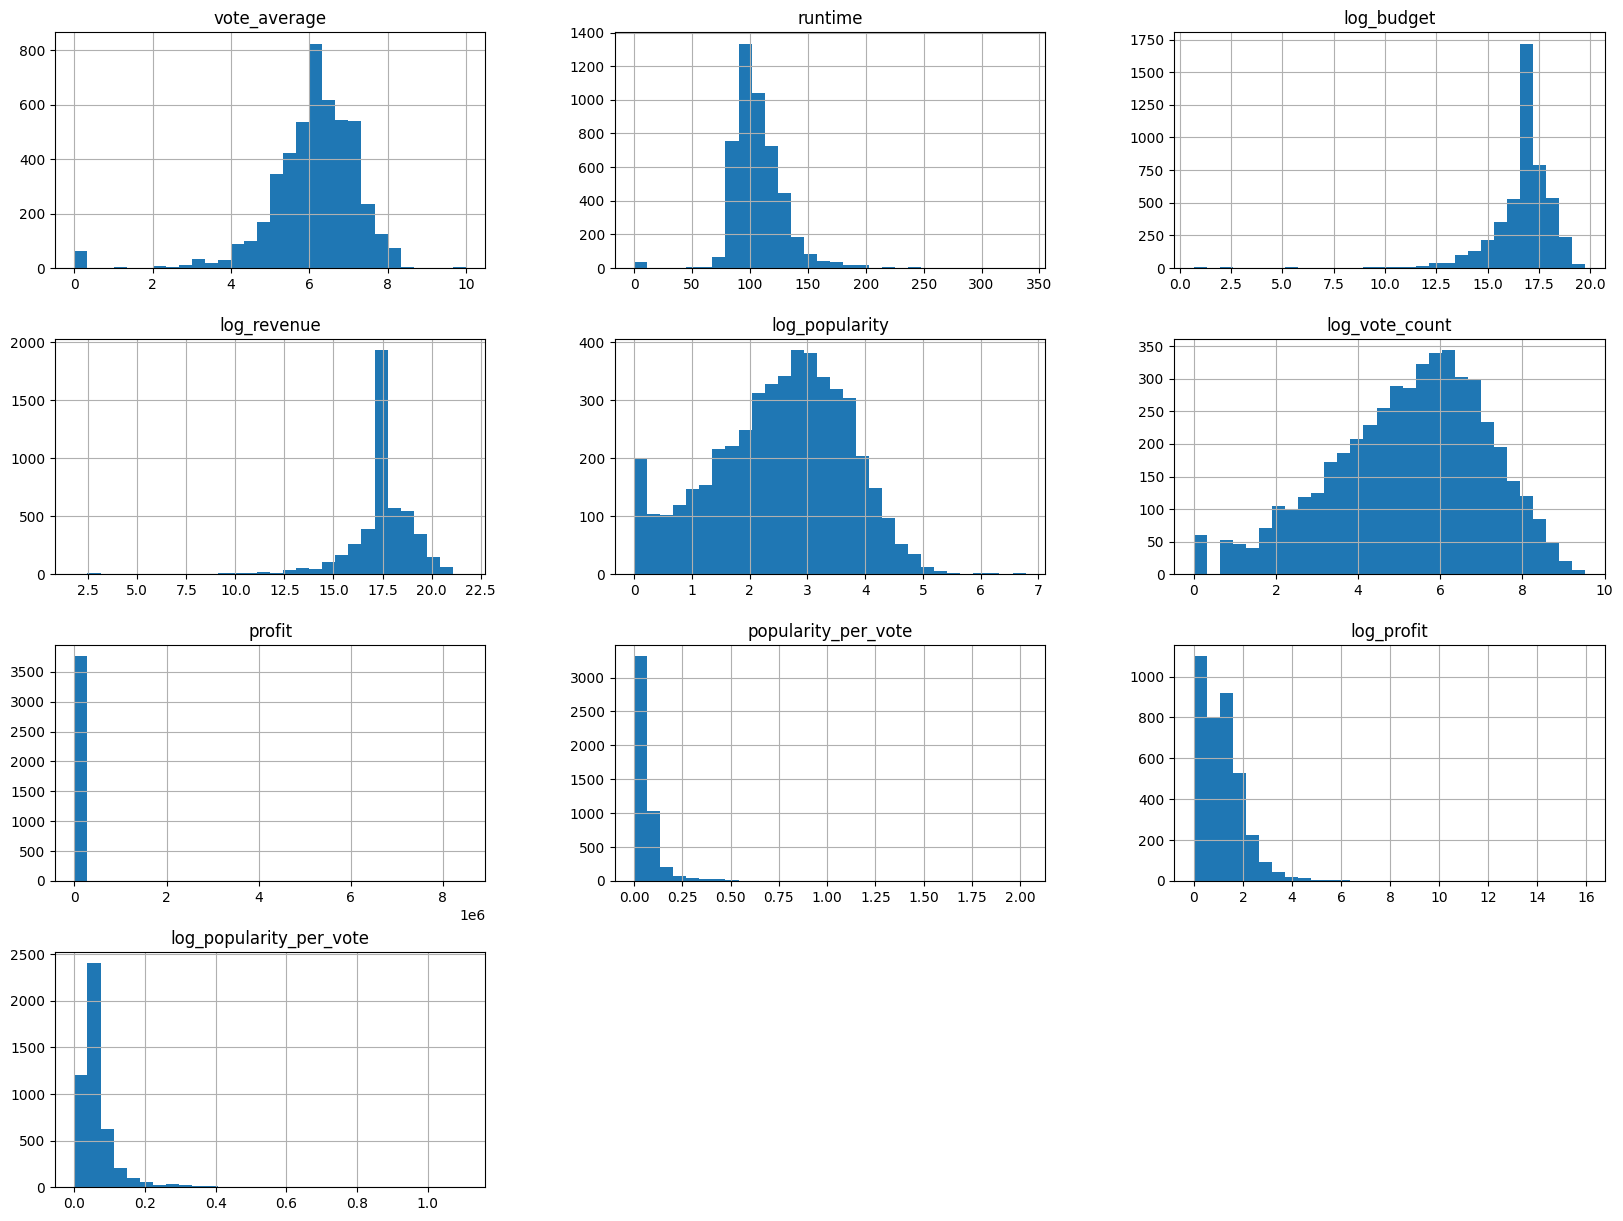

In [196]:
movies1.hist(bins=30,figsize=(20,15))
plt.show()

The profit and popularity per vote histograms are still highly skewed. I will perform a log transformation on these to deal with this.

The profit was likely skewed because of the fact that the revenue and budget columns were very skewed, causing the profit ratio to be skewed as well.

The same can be said for the popularity per vote, due to the popularity and vote_counts being skewed

In [191]:
movies1['log_profit'] = np.log1p(movies1['profit'])

In [192]:
movies1['log_popularity_per_vote'] = np.log1p(movies1['popularity_per_vote'])

# Model Development

I will firstly build an MLR model to predict the revenue of a movie based on the popularity, budget and vote count. This is because they had positive correlations from the statistical analysis.

In [ ]:
from sklearn.metrics import root_mean_squared_error


features = ['log_budget', 'log_popularity', 'log_vote_count'] 
X = movies1[features]
y = movies1['log_revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
print(f"Test RMSE: {rmse}")

r2score = lr.score(X_test,y_test)
print(f"Test R^2 score: {r2score}")

Test RMSE: 1.3661758413660157
Test R^2 score: 0.3078060053402102
